## DM PROJECT - Group B

By:

- Catarina Palha, M20190156
- Mafalda Zúquete, M20190257
- Maren Leuthner, M20190134


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('A2Z_insurance.csv')
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Brithday Year',
       'Educational Degree', 'Gross Monthly Salary', 'Geographic Living Area',
       'Has Children (Y=1)', 'Customer Monetary Value', 'Claims Rate',
       'Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

In [4]:
#Drop the columns Birthday year
df = df.drop('Brithday Year', axis = 1)
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'],
      dtype='object')

In [5]:
df.dtypes
#Everything ok with the types.

Customer Identity                        int64
First Policy´s Year                    float64
Educational Degree                      object
Gross Monthly Salary                   float64
Geographic Living Area                 float64
Has Children (Y=1)                     float64
Customer Monetary Value                float64
Claims Rate                            float64
Premiums in LOB: Motor                 float64
Premiums in LOB: Household             float64
Premiums in LOB: Health                float64
Premiums in LOB:  Life                 float64
Premiums in LOB: Work Compensations    float64
dtype: object

In [6]:
df.shape

(10296, 13)

In [7]:
df.describe()

,Customer Identity,First Policy´s Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10296.00000,10266.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,5148.50000,1991.062634,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,10296.00000,53784.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [8]:
df.info()
#We have NaN values.
#How many?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 13 columns):
Customer Identity                      10296 non-null int64
First Policy´s Year                    10266 non-null float64
Educational Degree                     10279 non-null object
Gross Monthly Salary                   10260 non-null float64
Geographic Living Area                 10295 non-null float64
Has Children (Y=1)                     10275 non-null float64
Customer Monetary Value                10296 non-null float64
Claims Rate                            10296 non-null float64
Premiums in LOB: Motor                 10262 non-null float64
Premiums in LOB: Household             10296 non-null float64
Premiums in LOB: Health                10253 non-null float64
Premiums in LOB:  Life                 10192 non-null float64
Premiums in LOB: Work Compensations    10210 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()
#It seems that we have a lot of NaN values in the Premiuns.
#Let's check exactly how many rows have NaN values.

Customer Identity                        0
First Policy´s Year                     30
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

In [10]:
df_NaN = df[df.isna().any(axis=1)]
df_NaN.shape

#We have 295 rows with NaN values. Can we just drop them? Nop. This represents 2,86% of the data, we're going to loose too many information.

(295, 13)

## Replacing NaN

In [11]:
#We can immediatly replace the NaN values in the premimns by 0 because 
#we'll assume that if there is a NaN values it's because the client doesn't have that kind of insurance.

df['Premiums in LOB: Motor'] = df['Premiums in LOB: Motor'].fillna(0)
df['Premiums in LOB: Health'] = df['Premiums in LOB: Health'].fillna(0)
df['Premiums in LOB:  Life'] = df['Premiums in LOB:  Life'].fillna(0)
df['Premiums in LOB: Work Compensations'] = df['Premiums in LOB: Work Compensations'].fillna(0)
df['Premiums in LOB: Household'] = df['Premiums in LOB: Household'].fillna(0)

#Let's check again the NaN values.

In [12]:
df.isnull().sum().sum()
#The number of NaN values decresed a lot, still we're not going to drop those.
#We decided that we're going to replace them because we don't want to loose informatation.

105

In [13]:
#Let's see what we need to replace
print(df.isnull().sum())
print(df_NaN.shape) # 78 rows still have NaN values.

#First Year policy: we can use CMV to find the values needed.
#Educational Degree: we can replace them by looking into the mean salary of each Educational degree and replace them.
#Gross Monthly Salary: Same as Educational degree but the other way around (?)
#Geographic Living Area: replace by the mode, or look into the salary.
#Has Children: 

Customer Identity                       0
First Policy´s Year                    30
Educational Degree                     17
Gross Monthly Salary                   36
Geographic Living Area                  1
Has Children (Y=1)                     21
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
dtype: int64
(295, 13)


In [14]:
#Before we start to replace values. We want to check if there is some inconsistant data in this rows.~
#If there is it'll be immediately dropped.

df_NaN = df[df.isna().any(axis=1)]

df_NaN.describe()
#It doesn't seems to be inconsistent data. (for now)
#Let's then start replacing the NaN values!!!

,Customer Identity,First Policy´s Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,78.000000,48.000000,42.000000,77.000000,57.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,4924.833333,1983.833333,2631.785714,2.415584,0.701754,172.438077,0.688462,300.441154,131.107051,158.498462,34.731538,38.716795
std,2982.979058,6.950688,915.084550,1.128001,0.461555,216.421279,0.347055,149.536279,178.527594,76.894793,35.794989,40.384796
min,22.000000,1974.000000,924.000000,1.000000,0.000000,-291.160000,0.000000,0.000000,-50.000000,0.000000,-4.000000,-10.000000
25%,2505.500000,1978.000000,1953.250000,2.000000,0.000000,-25.000000,0.372500,178.005000,0.000000,97.880000,8.807500,11.000000
50%,4788.500000,1981.500000,2667.500000,2.000000,1.000000,113.860000,0.750000,303.780000,61.675000,158.640000,20.115000,25.560000
75%,7466.750000,1989.000000,3223.750000,4.000000,1.000000,385.690000,1.000000,425.190000,210.450000,220.040000,52.455000,59.012500
max,10011.000000,1998.000000,4465.000000,4.000000,1.000000,575.010000,1.620000,561.660000,926.850000,311.280000,163.920000,175.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AC7ABE0>]],
      dtype=object)

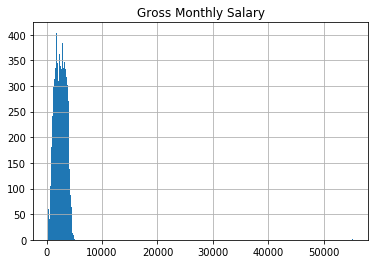

In [15]:
#Let's see what we have about the salary.

#Should we replace the Gross Monthly Salary with the mean or the median?
 
df.hist(column='Gross Monthly Salary', bins = 500)


In [16]:
df['Gross Monthly Salary'].nlargest(10) #These are outliers, we'll deal with this latter.

5882    55215.0
8261    34490.0
7510     5021.0
4244     4995.0
4440     4904.0
6902     4897.0
4772     4883.0
8284     4883.0
9433     4883.0
1406     4872.0
Name: Gross Monthly Salary, dtype: float64

In [17]:
#The histogram of the data appears to be symmetric, however, there are outliers that are very removed from the rest of the data and,
#for that reason, we have chosen to replace the null values in the 'Gross Monthly Salary' column with the median and not the mean.

median = df['Gross Monthly Salary'].median()
df['Gross Monthly Salary'] = df['Gross Monthly Salary'].fillna(median)

df['Gross Monthly Salary'].isnull().sum()
#Puff, no more NaN values in the Salary. #Nice shot Mafas, so proud of my sis ^^!!

0

In [18]:
#NEXT!!! Educational degree replacement based on Salary.
#We'll calculate the median salary of the grouped educational degree.

df_edu = df[['Educational Degree', 'Gross Monthly Salary']]

df_not_nan = df_edu[df_edu.notna().any(axis = 1)]

df_notNA_grouped = df_not_nan.groupby(['Educational Degree'])['Gross Monthly Salary'].median()
df_notNA_grouped

Educational Degree
1 - Basic          1714.00
2 - High School    2501.75
3 - BSc/MSc        2609.00
4 - PhD            2644.00
Name: Gross Monthly Salary, dtype: float64

In [19]:
df[df.isna().any(axis = 1)]

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
296,297,NaN,4 - PhD,3591.0,NaN,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
619,620,1980.0,3 - BSc/MSc,1333.0,2.0,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
755,756,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
772,773,1998.0,2 - High School,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
896,897,NaN,NaN,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
1707,1708,1992.0,NaN,3827.0,4.0,0.0,355.52,0.33,222.71,146.70,0.00,94.13,105.24
2227,2228,NaN,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2362,2363,1981.0,2 - High School,1607.0,2.0,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2449,2450,NaN,NaN,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2671,2672,1992.0,2 - High School,1140.0,2.0,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23


In [20]:
#Replacing the NaN values of Educational Degree column based on the median of gross salary of which level of education.

df.loc[896,'Educational Degree'] = '4 - PhD'

df.loc[1707,'Educational Degree'] = '4 - PhD'

df.loc[2449,'Educational Degree'] = '4 - PhD'

df.loc[2728,'Educational Degree'] = '4 - PhD'

df.loc[2770,'Educational Degree'] = '1 - Basic'

df.loc[3056,'Educational Degree'] = '1 - Basic'

df.loc[4423,'Educational Degree'] = '4 - PhD'

df.loc[6560,'Educational Degree'] = '2 - High School'

df.loc[6535,'Educational Degree'] = '4 - PhD'

df.loc[7321,'Educational Degree'] = '4 - PhD'

df.loc[7470,'Educational Degree'] = '4 - PhD'

df.loc[8081,'Educational Degree'] = '4 - PhD'

df.loc[8173,'Educational Degree'] = '4 - PhD'

df.loc[8303,'Educational Degree'] = '2 - High School'

df.loc[9136,'Educational Degree'] = '2 - High School'

df.loc[9136,'Educational Degree'] = '3 - BSc/MSc'

df.loc[9312,'Educational Degree'] = '1 - Basic'

df.loc[9610,'Educational Degree'] = '4 - PhD'

df['Educational Degree'].isnull().sum()

0

In [21]:
#Geograpgic Living Area
#We decided to replace this single NaN value by the mode.

mode = df['Geographic Living Area'].mode() #it's 4.0

df['Geographic Living Area'] = df['Geographic Living Area'].fillna(4.0)

df['Geographic Living Area'].isnull().sum()

0

In [22]:
df[df.isna().any(axis = 1)]

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
296,297,NaN,4 - PhD,3591.0,4.0,NaN,-49.11,1.04,447.64,-25.00,130.58,0.89,12.89
619,620,1980.0,3 - BSc/MSc,1333.0,2.0,NaN,312.52,0.40,286.83,-6.10,175.70,52.90,56.79
755,756,NaN,4 - PhD,2913.0,3.0,0.0,430.20,0.28,465.20,59.45,94.13,4.89,10.00
772,773,1998.0,2 - High School,3601.0,2.0,NaN,27.01,0.94,104.91,308.95,285.61,64.90,52.90
896,897,NaN,4 - PhD,2643.0,1.0,1.0,-25.00,1.00,515.54,33.90,47.01,12.89,3.78
2227,2228,NaN,3 - BSc/MSc,1987.0,2.0,NaN,429.87,0.25,376.85,33.90,154.25,39.34,4.78
2362,2363,1981.0,2 - High School,1607.0,2.0,NaN,271.51,0.64,292.61,308.40,159.14,11.89,59.68
2449,2450,NaN,4 - PhD,4465.0,4.0,0.0,457.75,0.36,338.73,187.25,175.81,43.23,4.78
2671,2672,1992.0,2 - High School,1140.0,2.0,NaN,356.40,0.54,168.03,265.60,273.94,68.79,52.23
2703,2704,NaN,1 - Basic,2105.0,2.0,NaN,302.62,0.54,299.28,167.25,162.92,28.34,51.01


In [23]:
#Has Children
#I'm not seeing a pattern on this, so let's replace by the mode.

mode_children = df['Has Children (Y=1)'].mode() #it's 1.0

df['Has Children (Y=1)'] = df['Has Children (Y=1)'].fillna(1.0)

df['Has Children (Y=1)'].isnull().sum()

0

In [24]:
#First year Policy
#We need to add some variables first.

df['Premiums Sum'] = df['Premiums in LOB: Motor'] +  df['Premiums in LOB: Household'] + df['Premiums in LOB: Health'] + df['Premiums in LOB:  Life'] + df['Premiums in LOB: Work Compensations']

df['Age As Client'] = 2016 - df['First Policy´s Year']

df['Anual Salary'] = df['Gross Monthly Salary'] * 12

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD67908>]],
      dtype=object)

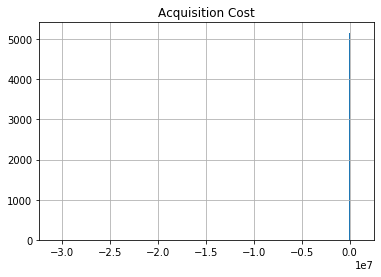

In [25]:
#We know that CMV = CostumerAnnualProfit*NumberYearsThatIsCostumer - AcquisitionCos
#Wich implies that NumberYearsThatIsCostumer = (CMV - AcquisitionCost) / CostumerAnnualProfit

df['Costumer Annual Profit'] = df['Premiums Sum']

df['Acquisition Cost'] =  df['Costumer Annual Profit']*df['Age As Client'] - df['Customer Monetary Value']

df['First Year Dummy'] = 2016 - ((df['Customer Monetary Value'] + df['Acquisition Cost'])/ df['Costumer Annual Profit']) #Just to control if it's correct

df.hist(column='Acquisition Cost', bins = 500)

#We have outliers so we're using the median.

In [26]:
#We can now calculate the Acquisition Cost mean:

acquisition_median =  df['Acquisition Cost'].median()

acquisition_median

#df.head()
df['Acquisition Cost'] = df['Acquisition Cost'].fillna(21159.005000000005)

In [27]:
df.head()

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum,Age As Client,Anual Salary,Costumer Annual Profit,Acquisition Cost,First Year Dummy
0,1,1985.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,31.0,26124.0,665.56,20251.39,1985.0
1,2,1981.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96,35.0,8124.0,910.96,32014.73,1981.0
2,3,1991.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60,25.0,27324.0,740.60,18010.33,1991.0
3,4,1990.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,26.0,13188.0,600.68,15634.67,1990.0
4,5,1986.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,30.0,21156.0,629.24,18841.97,1986.0


In [28]:
#Now we can replace the NaN values in the First Policy columns using this value.

df['First Policy´s Year'] = df['First Policy´s Year'].fillna(2016 - ((df['Customer Monetary Value'] + df['Acquisition Cost'])/ df['Costumer Annual Profit']))

df['Age As Client'] = df['Age As Client'].fillna(2016 - df['First Policy´s Year'])

df = df.drop(['First Year Dummy'], axis = 1)

df.isnull().sum()

#We finally don't have NaN values.

Customer Identity                      0
First Policy´s Year                    0
Educational Degree                     0
Gross Monthly Salary                   0
Geographic Living Area                 0
Has Children (Y=1)                     0
Customer Monetary Value                0
Claims Rate                            0
Premiums in LOB: Motor                 0
Premiums in LOB: Household             0
Premiums in LOB: Health                0
Premiums in LOB:  Life                 0
Premiums in LOB: Work Compensations    0
Premiums Sum                           0
Age As Client                          0
Anual Salary                           0
Costumer Annual Profit                 0
Acquisition Cost                       0
dtype: int64

In [29]:
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations',
       'Premiums Sum', 'Age As Client', 'Anual Salary',
       'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

## Outlier Detection

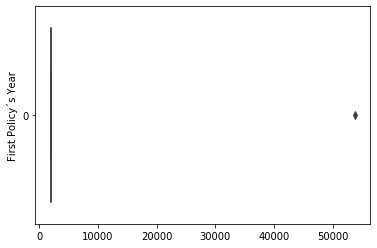

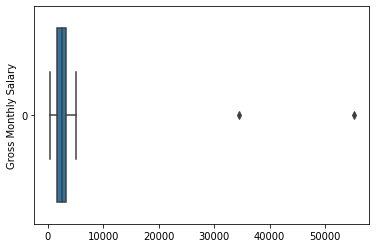

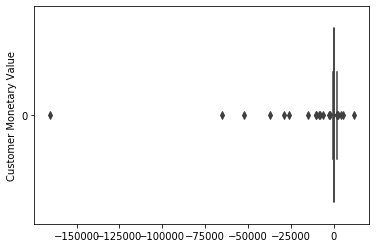

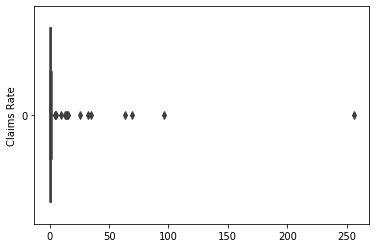

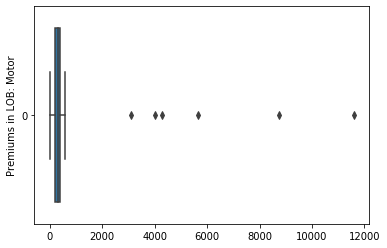

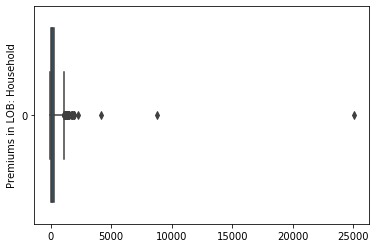

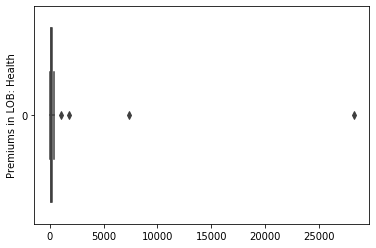

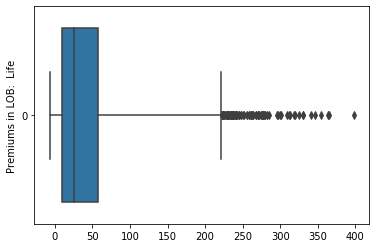

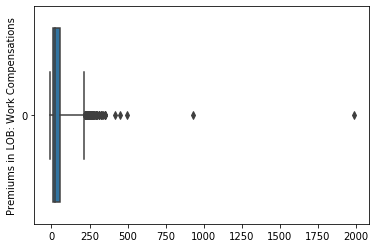

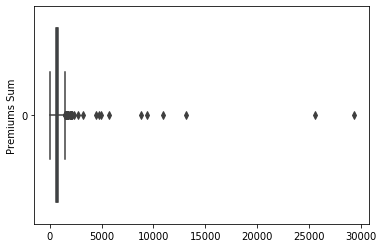

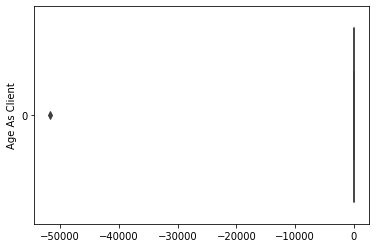

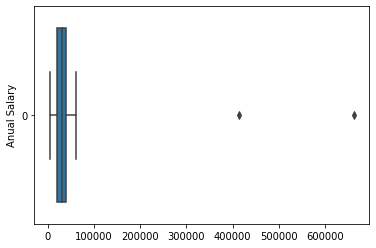

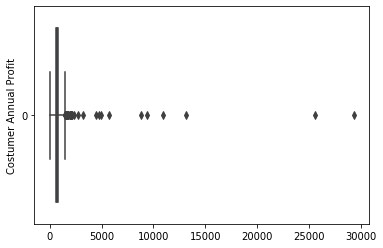

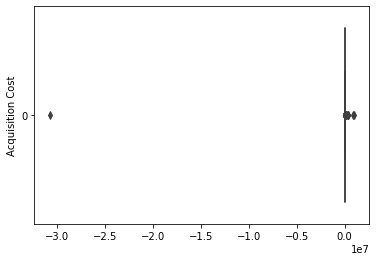

In [30]:
#We're going to spot the outliers with boxplots and them remove them with the Z-score.

col = ['First Policy´s Year', 'Gross Monthly Salary', 'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations',
       'Premiums Sum', 'Age As Client', 'Anual Salary',
       'Costumer Annual Profit', 'Acquisition Cost']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

In [31]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations',
       'Premiums Sum', 'Age As Client', 'Anual Salary',
       'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

In [32]:
out_1 = zscore(df['First Policy´s Year'])
out_2 = zscore(df['Gross Monthly Salary'])
out_3 = zscore(df['Customer Monetary Value'])
out_4 = zscore(df['Claims Rate'])
out_5 = zscore(df['Premiums in LOB: Motor'])
out_6 = zscore(df['Premiums in LOB: Household'])
out_7 = zscore(df['Premiums in LOB: Health'])
out_8 = zscore(df['Premiums in LOB:  Life'])
out_9 = zscore(df['Premiums in LOB: Work Compensations'])
out_10 = zscore(df['Costumer Annual Profit'])
out_11 = zscore(df['Acquisition Cost'])


df_out = pd.DataFrame({'First Policy Out': out_1, 'Gross Monthly Salary': out_2,
                       'Customer Monetary Value': out_3, 'Claims Rate': out_4,
                       'Premiums in LOB: Motor': out_5, 'Premiums in LOB: Household': out_6,
                       'Premiums in LOB: Health': out_7, 'Premiums in LOB:  Life': out_8,
                       'Premiums in LOB: Work Compensations': out_9, 'Costumer Annual Profit': out_10,
                       'Acquisition Cost': out_11
                      })

In [33]:
df_out.shape

(10296, 11)

In [34]:
#if we consider a threshold of 3 we have 411 outliers, that represents 3,9% of the data that's too much.
#We have to consider as threshold 4.

In [35]:
df_out_1 = df_out[(df_out['First Policy Out'] > 4) | (df_out['First Policy Out'] < -4)]

#1 outlier with threshold = 3
#1 outlier with threshold = 4

list_1 = list(df_out_1.index)

In [36]:
df_out_2 = df_out[(df_out['Gross Monthly Salary'] > 4) | (df_out['Gross Monthly Salary'] < -4)]

#2 outliers with threshold = 3 
#2 outliers with threshold = 4

list_2 = list(df_out_2.index)

In [37]:
df_out_3 = df_out[(df_out['Customer Monetary Value'] > 4) | (df_out['Customer Monetary Value'] < -4)]

#13 outliers with threshold = 3 
#12 outliers with threshold = 4 

list_3 = list(df_out_3.index)

In [38]:
df_out_4 = df_out[(df_out['Claims Rate'] > 4) | (df_out['Claims Rate'] < -4)]

#12 outliers with threshold = 3 
#11 outliers with threshold = 4

list_4 = list(df_out_4.index)

In [39]:
df_out_5 = df_out[(df_out['Premiums in LOB: Motor'] > 4) | (df_out['Premiums in LOB: Motor'] < -4)]

#6 outliers with threshold = 3 
#6 outliers with threshold = 4

list_5 = list(df_out_5.index)

In [40]:
df_out_6 = df_out[(df_out['Premiums in LOB: Household'] > 4) | (df_out['Premiums in LOB: Household'] < -4)]

#36 outliers with threshold = 3 
#12 outliers with threshold = 4

list_6 = list(df_out_6.index)

In [41]:
df_out_7 = df_out[(df_out['Premiums in LOB: Health'] > 4) | (df_out['Premiums in LOB: Health'] < -4)]

#3 outliers with threshold = 3
#3 outliers with threshold = 4

list_7 = list(df_out_7.index)

In [42]:
df_out_8 = df_out[(df_out['Premiums in LOB:  Life'] > 4) | (df_out['Premiums in LOB:  Life'] < -4)]

#210 outliers with threshold = 3
#79 outliers with threshold = 4
list_8 = list(df_out_8.index)

In [43]:
df_out_9 = df_out[(df_out['Premiums in LOB: Work Compensations'] > 4) | (df_out['Premiums in LOB: Work Compensations'] < -4)]

#162 outliers with threshold = 3
#62 outliers with threshold = 4

list_9 = list(df_out_9.index)

In [44]:
df_out_10 = df_out[(df_out['Costumer Annual Profit'] > 4) | (df_out['Costumer Annual Profit'] < -4)]

# 12 outliers with threshold = 4
# 13 outliers with threshold = 3

list_10 = list(df_out_10.index)

In [45]:
df_out_11 = df_out[(df_out['Acquisition Cost'] > 4) | (df_out['Acquisition Cost'] < -4)]

#1 outliers with threshold = 4
#2 outliers with threshold = 3

list_11 = list(df_out_11.index)

In [46]:
list_dummy = list_1 + list_2 + list_3 + list_4 + list_5 + list_6 + list_7 + list_8 + list_9 + list_10 + list_11

list_to_remove = []

for i in list_dummy:
  if i not in list_to_remove:
    list_to_remove.append(i)


In [47]:
#How many outliers after all? 173 and 410

len(list_to_remove)

#173 outliers represent 1,6% of the data, which is acceptable.
#411 outliers represent 3,9% of the data, is acceptable?
#Let's drop them.

173

In [48]:
for i in list_to_remove:
    df = df.drop([df.index[i]]) #10112

In [49]:
df.shape
#We have now 10123 rows on the database.

(10123, 18)

In [50]:
df.duplicated().sum()
#No duplicated rows.
df['Customer Identity'].duplicated().sum()
#This means that we don't have duplicated client, each row defines a unique client.

0

In [51]:
#We can't have the Premiums Sum greater than the Anual Salary

df[df['Premiums Sum'] > df['Anual Salary']]

#Let's drop this row.
df = df.drop([df.index[9149]])

In [52]:
df.shape
#After cleaning the data we have now 10122 rows and 19 columns.
#It means we dropped 1,6% of the data. PERFECT!!


(10122, 18)

In [53]:
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations',
       'Premiums Sum', 'Age As Client', 'Anual Salary',
       'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

Negative values CMV

In [54]:
cmv_neg = df[df['Customer Monetary Value'] < 0]
cmv_neg.shape
#we've around 26% of costumers with negative CMV
#This means these costumers aren't profit to the company 

(2723, 18)

In [55]:
cmv_neg[(cmv_neg['Premiums in LOB: Motor'] < 0) | (cmv_neg['Premiums in LOB: Household'] < 0) | (cmv_neg['Premiums in LOB: Health'] <0 ) 
        | (cmv_neg['Premiums in LOB:  Life'] <0 ) | (cmv_neg['Premiums in LOB: Work Compensations'] <0 )]

#2711

#840 costumers have some kind of negative premium. (30%)

#print(cmv_neg[cmv_neg['Educational Degree'] == '2 - High School'].count())
print(cmv_neg[cmv_neg['Educational Degree'] == '3 - BSc/MSc'].count())
#print(cmv_neg[cmv_neg['Educational Degree'] == '4 - PhD'].count())
#print(cmv_neg[cmv_neg['Educational Degree'] == '1 - Basic'].count())

#1321 of the costumers that have negative cmv have a education level of BSc/MSc. (13%)
#The costumers with a BSc/MSc show a tendency to have negtive CMV's.

Customer Identity                      1321
First Policy´s Year                    1321
Educational Degree                     1321
Gross Monthly Salary                   1321
Geographic Living Area                 1321
Has Children (Y=1)                     1321
Customer Monetary Value                1321
Claims Rate                            1321
Premiums in LOB: Motor                 1321
Premiums in LOB: Household             1321
Premiums in LOB: Health                1321
Premiums in LOB:  Life                 1321
Premiums in LOB: Work Compensations    1321
Premiums Sum                           1321
Age As Client                          1321
Anual Salary                           1321
Costumer Annual Profit                 1321
Acquisition Cost                       1321
dtype: int64


Negative Premiums

In [56]:
pre_neg = df[(df['Premiums in LOB: Work Compensations'] < 0) | (df['Premiums in LOB: Motor'] < 0) |
             (df['Premiums in LOB: Household'] < 0) | (df['Premiums in LOB: Health'] < 0) | (df['Premiums in LOB:  Life'] < 0)]

pre_neg

#2194 costumers have some kind of negative premium

# 1 costumer with negative Premiums in LOB: Motor.
# 1075 costumers with negative Premiums in LOB: Household.
# 1 costumer with negative Premiums in LOB: Health.
# 660 costumers with negative Premiums in LOB:  Life.
# 910 costumers with negative Premiums in LOB: Work Compensations.

,Customer Identity,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum,Age As Client,Anual Salary,Costumer Annual Profit,Acquisition Cost
14,15,1983.0,2 - High School,1981.0,1.0,1.0,-89.00,1.12,504.43,-70.00,72.79,10.89,16.89,535.00,33.0,23772.0,535.00,17744.00
15,16,1988.0,3 - BSc/MSc,974.0,4.0,1.0,290.06,0.53,318.06,93.90,247.49,-3.00,19.67,676.12,28.0,11688.0,676.12,18641.30
26,27,1978.0,4 - PhD,4281.0,3.0,0.0,430.86,0.38,330.84,162.80,228.82,-5.00,22.78,740.24,38.0,51372.0,740.24,27698.26
28,29,1995.0,3 - BSc/MSc,3639.0,4.0,0.0,264.17,0.50,301.28,18.90,258.05,-4.00,-0.11,574.12,21.0,43668.0,574.12,11792.35
29,30,1980.0,3 - BSc/MSc,2660.0,3.0,0.0,2.00,0.96,524.21,25.00,54.90,7.00,-5.00,606.11,36.0,31920.0,606.11,21817.96
30,31,1988.0,2 - High School,2148.0,4.0,1.0,427.76,0.19,483.09,-15.00,92.24,3.89,-5.11,559.11,28.0,25776.0,559.11,15227.32
36,37,1982.0,2 - High School,2401.0,4.0,1.0,7.24,0.94,320.95,-25.55,145.25,26.56,84.35,551.56,34.0,28812.0,551.56,18745.80
44,45,1985.0,3 - BSc/MSc,1065.0,1.0,1.0,-128.68,1.19,111.80,-35.00,208.26,224.71,44.23,554.00,31.0,12780.0,554.00,17302.68
48,49,1985.0,3 - BSc/MSc,2381.0,3.0,1.0,-132.88,1.20,468.09,-45.55,92.24,1.89,14.89,531.56,31.0,28572.0,531.56,16611.24
52,53,1986.0,3 - BSc/MSc,1960.0,3.0,1.0,-104.21,1.14,360.40,-40.55,212.04,12.78,10.89,555.56,30.0,23520.0,555.56,16771.01


In [57]:
print(pre_neg['Educational Degree'].mode())

print(pre_neg['Has Children (Y=1)'].mode())

#Costumers with  3 - BSc/MSc and children show worst results on the premiums especially in Premiums in LOB: Household.

0    3 - BSc/MSc
dtype: object
0    1.0
dtype: float64


## Data set division

We are going to split the data set in two:
Product Variables and Costumers Variables
And we're about to performe cluster technique in each set of variables individually.

Product Variables:
'Premiums in LOB: Motor',
'Premiums in LOB: Household', 
'Premiums in LOB: Health',
'Premiums in LOB:  Life', 
'Premiums in LOB: Work Compensations

Costumers Variables:
'First Policy´s Year', 
'Educational Degree',
'Gross Monthly Salary', 
'Geographic Living Area', 
'Has Children (Y=1)',
'Customer Monetary Value', 
'Claims Rate'
'Age As Client', 
'Anual Salary', 
'Costumer Annual Profit', 
'Acquisition Cost',


But, do we need all these variables?

## Feature Selection

Product Variables

In [58]:
df_product = df[['Premiums in LOB: Motor', 'Premiums in LOB: Household', 
                 'Premiums in LOB: Health', 'Premiums in LOB:  Life', 
                 'Premiums in LOB: Work Compensations']]

df_costumers = df[['First Policy´s Year', 'Educational Degree', 'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)', 
                   'Customer Monetary Value', 'Claims Rate', 'Age As Client', 'Anual Salary', 'Costumer Annual Profit', 'Acquisition Cost']]


In [59]:
df_costumers['Educational Degree'].replace('1 - Basic', 1, inplace = True)
df_costumers['Educational Degree'].replace('2 - High School', 2, inplace = True)
df_costumers['Educational Degree'].replace('3 - BSc/MSc', 3, inplace = True)
df_costumers['Educational Degree'].replace('4 - PhD', 4, inplace = True)

In [60]:
df_costumers.isnull().sum()

First Policy´s Year        0
Educational Degree         0
Gross Monthly Salary       0
Geographic Living Area     0
Has Children (Y=1)         0
Customer Monetary Value    0
Claims Rate                0
Age As Client              0
Anual Salary               0
Costumer Annual Profit     0
Acquisition Cost           0
dtype: int64

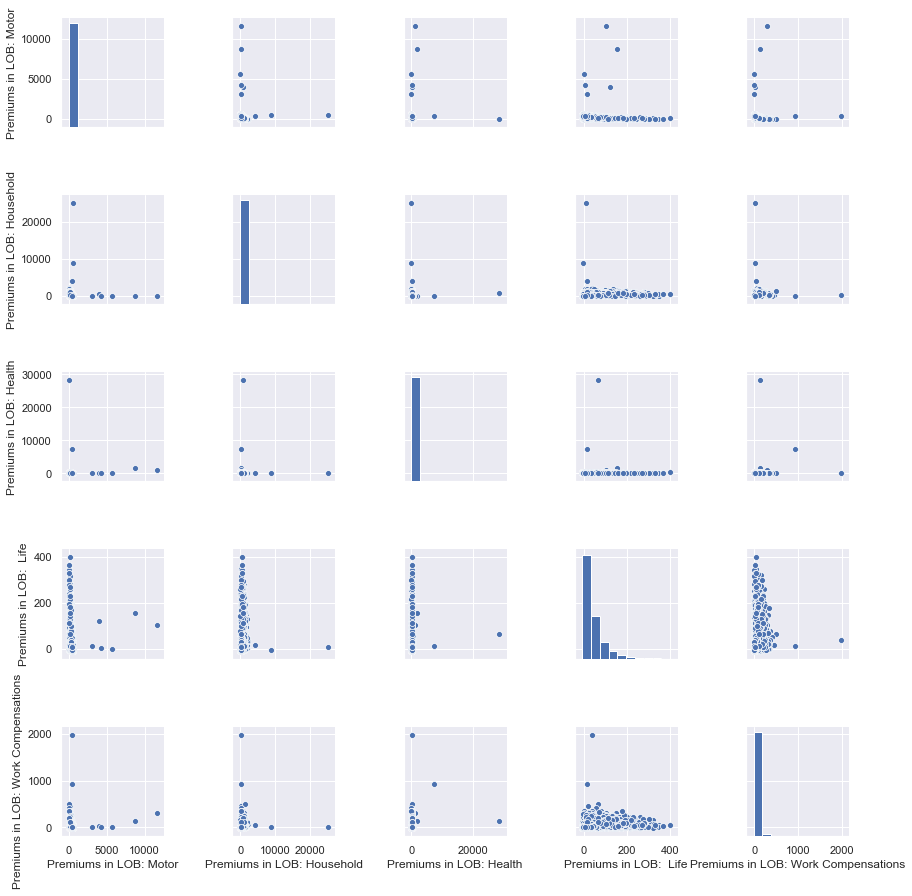

In [61]:
sns.set(rc={'figure.figsize':(0.001, 0.001)})
#sns.set(style="ticks", color_codes=True)

sns.pairplot(df_product)

plt.show()

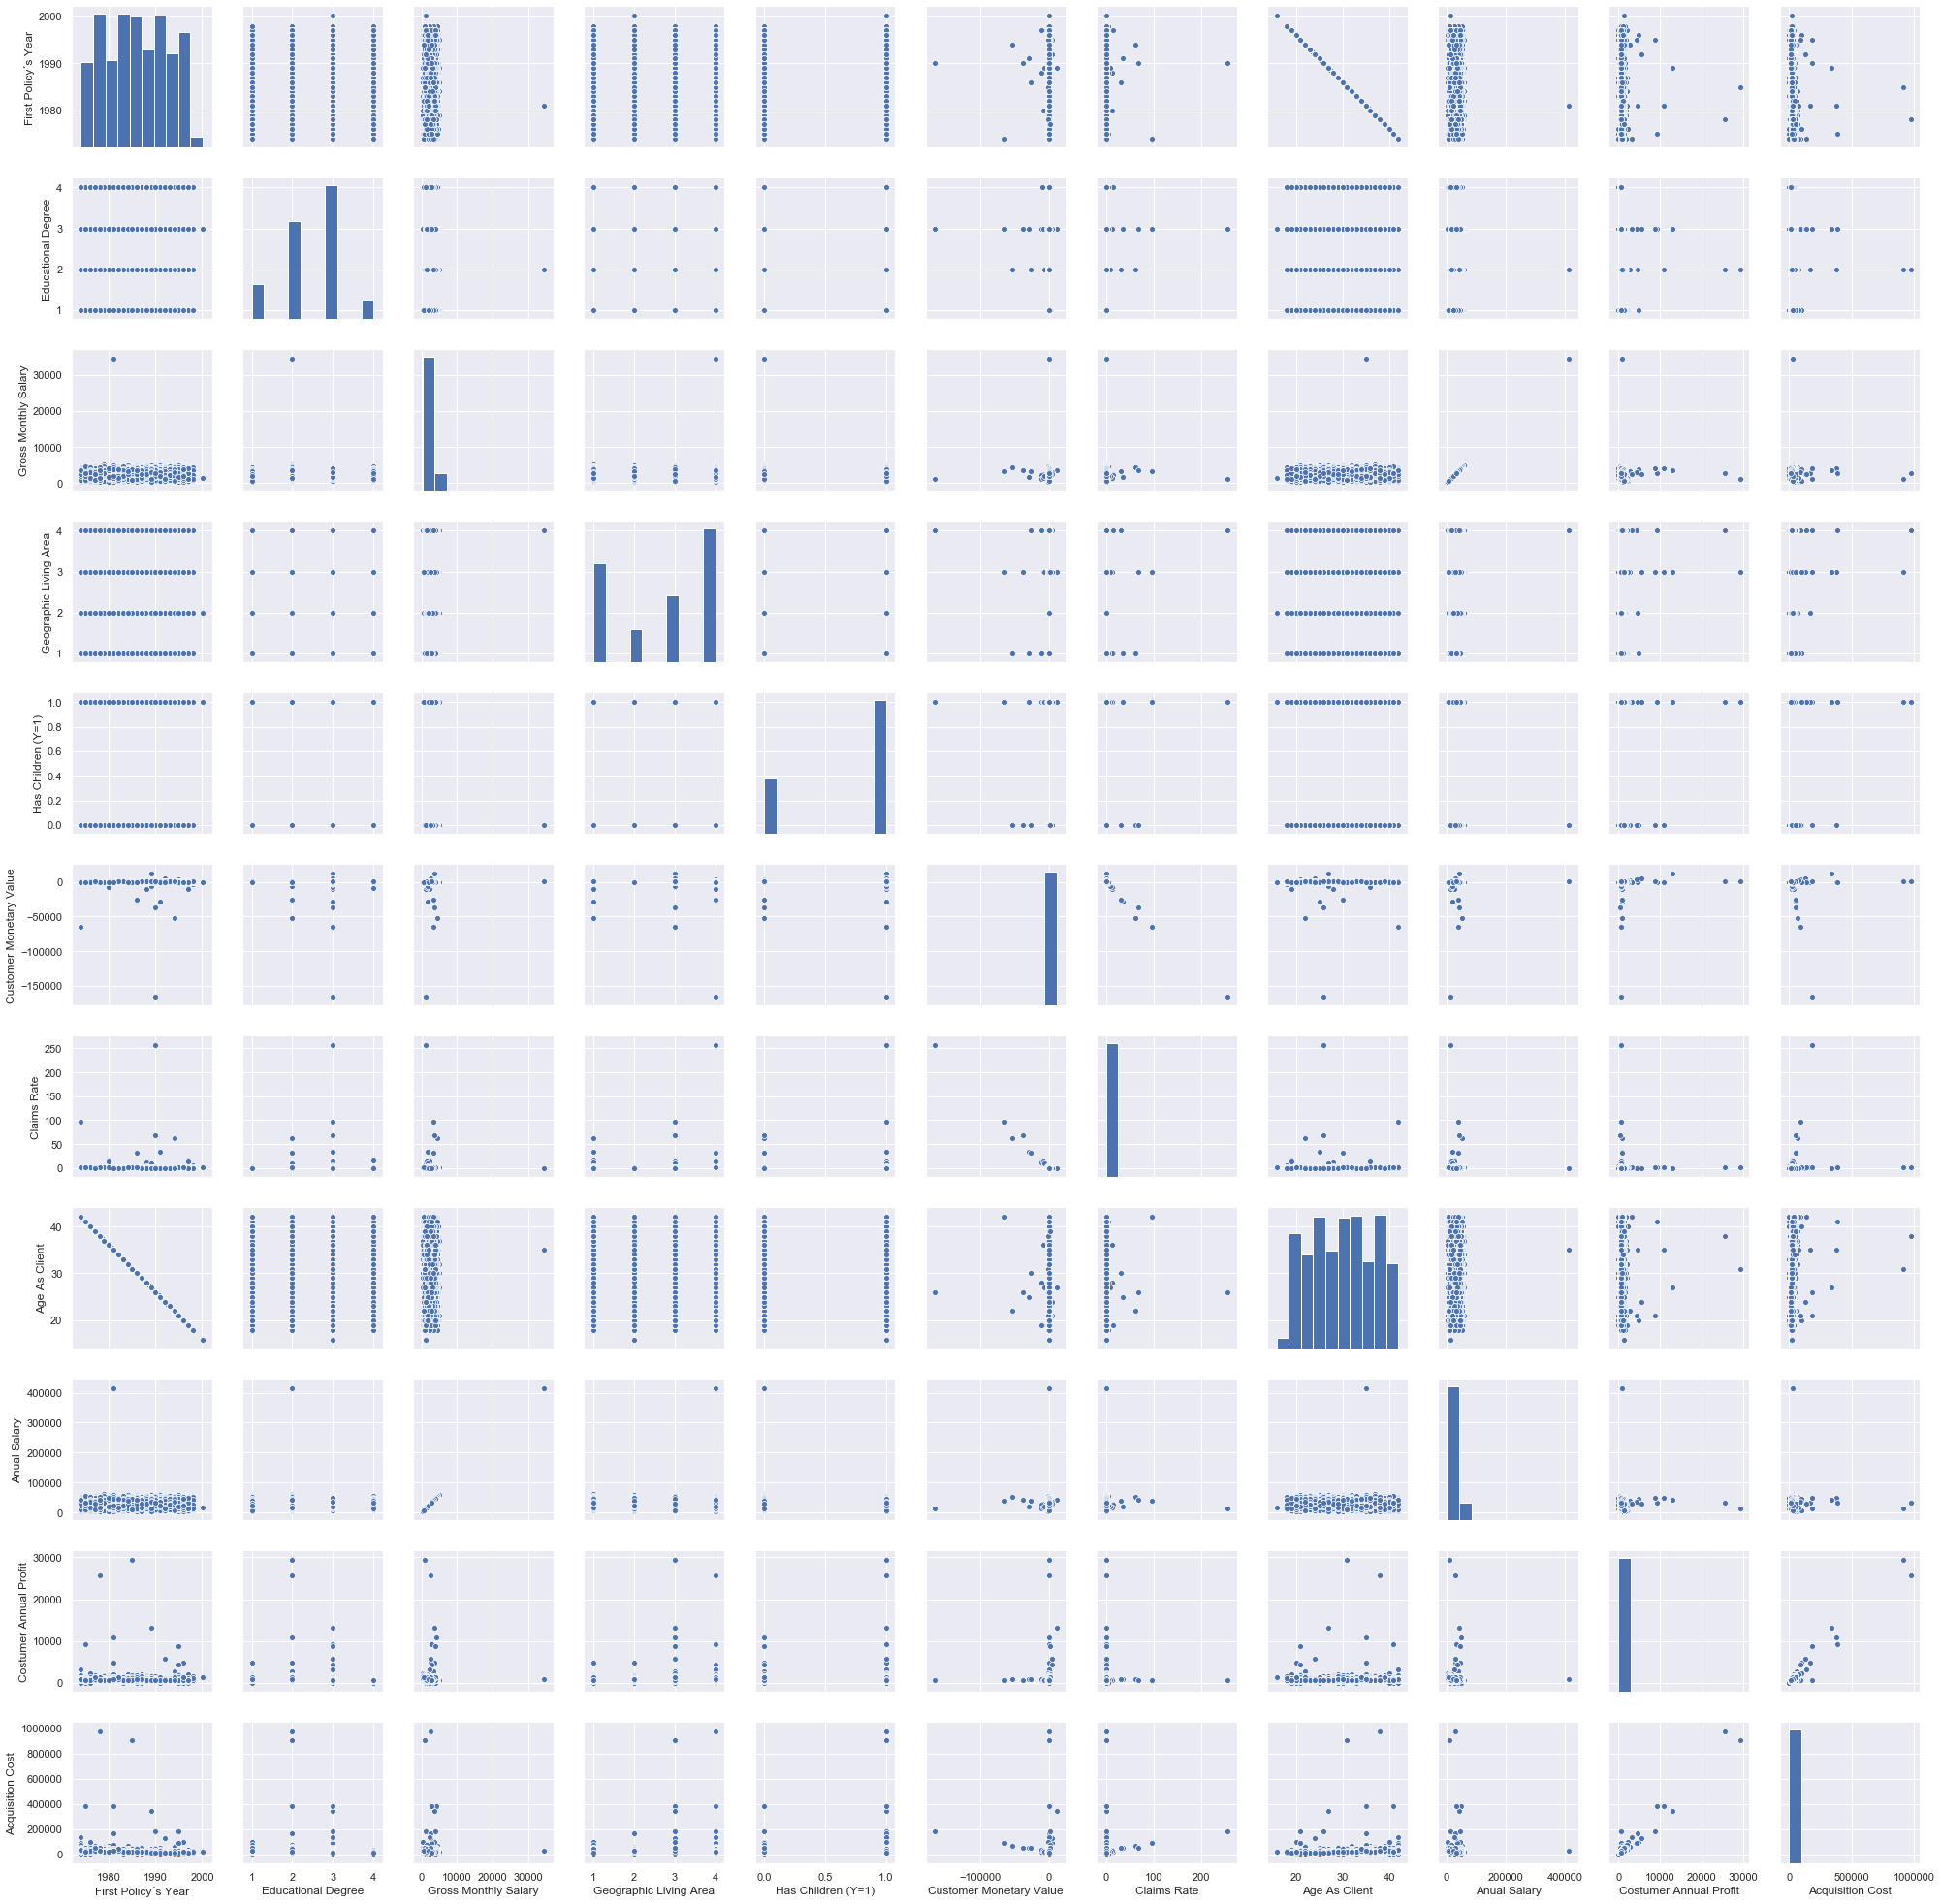

In [62]:
sns.pairplot(df_costumers)

plt.show()

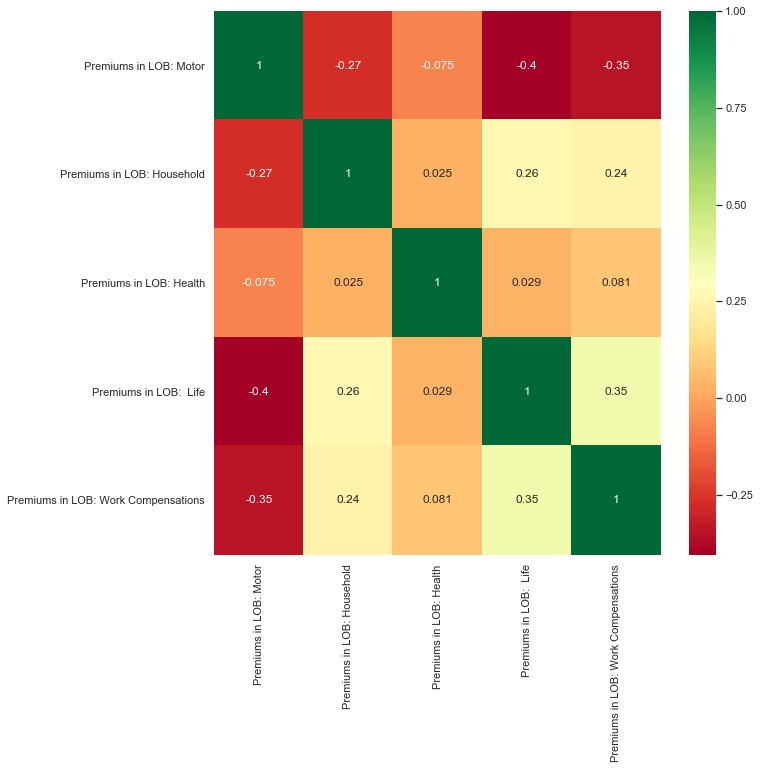

In [63]:
sns.set(rc={'figure.figsize':(10, 10)})

correlation_prod = df_product.corr()

sns.heatmap(correlation_prod, annot = True, cmap = "RdYlGn")

#There is no correlation between the premiums.

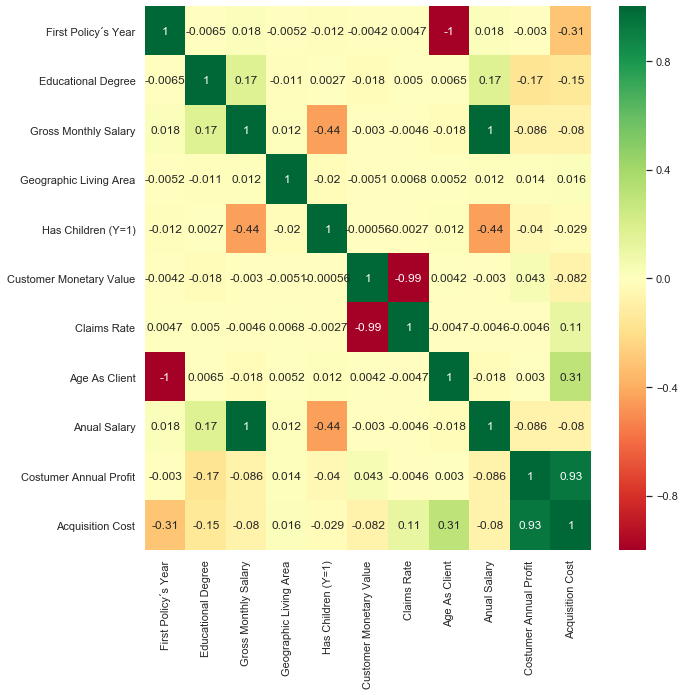

In [64]:
sns.set(rc={'figure.figsize':(10, 10)})

correlation_cos = df_costumers.corr()

sns.heatmap(correlation_cos, annot = True, cmap = "RdYlGn")

First Policy's Year and Age As Client have a correlation of -1, which is natural because we used the First Policy's Year to calculate the Age As Client.

Gross Monthly Salary and Annual Salary have a correlation of 1, which is natural because we used the Gross Monthly Salary to calculate the Annual Salary.

Geographic Living Area and Has Children ($Y = 1$) aren't strongly correlated with any variable.

Costumer Monetary Value and Claims Rate have a correlation of -0.99.

And finally, Costumer Annual Profit and Acquisition Cost have a correlation of 0.93.

## PCA 

Product Variables

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_product)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components= df_product.shape[1])

pc = pca.fit_transform(X_scaled)

In [67]:
eigen_values = pca.explained_variance_

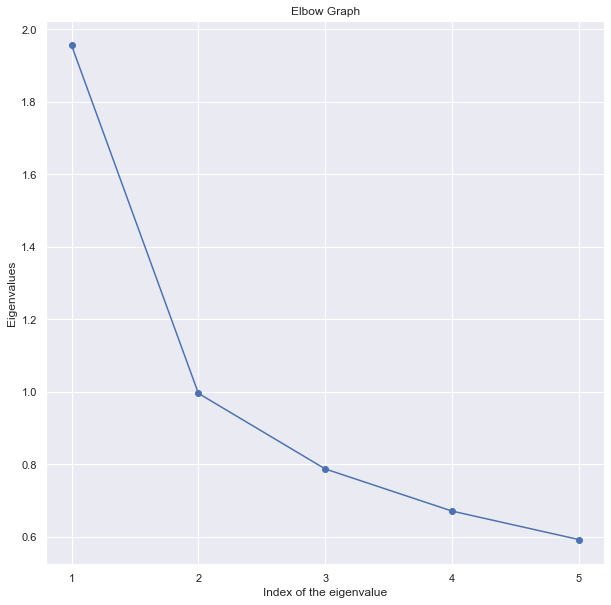

In [68]:
#elbow graph

possibilities = range(1, 6)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

The elbow graph says that we should use 2 components. but the explained variance ratio says it only explains around 60% of the variance, which is usually not good enough.

In [69]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39108886, 0.59015271, 0.74750559, 0.88160965, 1.        ])

Let's run the PCA again but with 3 components.

In [70]:
pca = PCA(n_components= 3)

pc = pca.fit_transform(X_scaled)

In [71]:
pca.components_


array([[-0.53214806,  0.42352327,  0.11083061,  0.52557052,  0.49893755],
       [ 0.01089972, -0.1432055 ,  0.98158942, -0.11916942,  0.04067225],
       [ 0.19672462,  0.89182107,  0.10623722, -0.27469397, -0.28144532]])

Let's calculate the loadings, those explain how much each variable is correlated with each component. 

In [72]:
(pca.components_.T * np.sqrt(pca.explained_variance_)).T

array([[-0.74417772,  0.59227235,  0.15499008,  0.73497942,  0.69773477],
       [ 0.01087472, -0.14287702,  0.97933784, -0.11889606,  0.04057895],
       [ 0.17450284,  0.79108204,  0.09423679, -0.24366487, -0.2496536 ]])

PC1 is negatively correlated with Premiums in LOB: Motor, Premiums in LOB:  Life and Premiums in LOB: Work Compensations.

The PC2 is positively correlated with Premiums in LOB: Health

And the PC3 is positively correlated with Premiums in LOB: Household.


Conclusions:

Although the principal components are well defined the only one that allows to decrease the number of dimensions isn't possible to interpret with the obtained values. 

Costumer variables

In [73]:
#We need to convert the categorical variables into numerical

In [74]:
df_costumers.columns

Index(['First Policy´s Year', 'Educational Degree', 'Gross Monthly Salary',
       'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Age As Client',
       'Anual Salary', 'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

In [75]:
X_scaled = scaler.fit_transform(df_costumers)

In [76]:
pca = PCA(n_components= df_costumers.shape[1])

pc = pca.fit_transform(X_scaled)

In [77]:
eigen_values = pca.explained_variance_

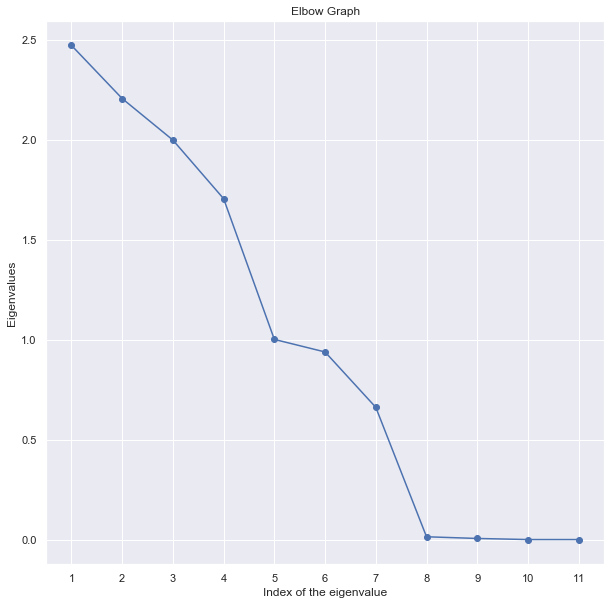

In [78]:
#elbow graph

possibilities = range(1, 12)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

In [79]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22470131, 0.42522628, 0.60686691, 0.76184719, 0.85284571,
       0.93813305, 0.99824749, 0.99950994, 1.        , 1.        ,
       1.        ])

Let's run the PCA again but this time with 5 components

In [80]:
pca = PCA(n_components= 5)

pc = pca.fit_transform(X_scaled)

Loadings

In [81]:
(pca.components_.T * np.sqrt(pca.explained_variance_)).T

array([[-4.77815892e-01, -2.85222694e-01, -7.34997993e-01,
        -3.07767886e-04,  4.22387124e-01, -7.85898821e-02,
         9.95755877e-02,  4.77815892e-01, -7.34997993e-01,
         5.07760174e-01,  6.33421973e-01],
       [-6.35334873e-01,  7.55542889e-02,  6.15263638e-01,
         3.72775077e-02, -4.61871968e-01, -1.71181353e-01,
         1.79425747e-01,  6.35334873e-01,  6.15263638e-01,
         3.10152456e-01,  5.13301285e-01],
       [ 2.37698363e-01,  8.88019258e-03, -2.98106578e-02,
         7.97569826e-03,  1.87605074e-02, -9.69896950e-01,
         9.70140236e-01, -2.37698363e-01, -2.98106578e-02,
        -2.14574239e-02,  2.52762125e-02],
       [ 5.55152774e-01, -2.64159467e-01,  1.14077471e-01,
         3.18460504e-02, -2.29325945e-01,  1.42428516e-01,
        -1.13092679e-01, -5.55152774e-01,  1.14077471e-01,
         7.78597347e-01,  5.47595307e-01],
       [ 1.14375271e-02,  1.59527263e-01,  1.86188614e-02,
        -9.82825348e-01,  5.72388808e-02, -7.33184240e-04,
  

We're going to keep Age As client, Salary and CMV.

In [82]:
df_product['Positive Motor'] = df_product['Premiums in LOB: Motor'] 
df_product['Positive Household'] = df_product['Premiums in LOB: Household'] 
df_product['Positive Health'] = df_product['Premiums in LOB: Health'] 
df_product['Positive Life'] = df_product['Premiums in LOB:  Life']
df_product['Positive Work'] = df_product['Premiums in LOB: Work Compensations']

col = ['Positive Motor', 'Positive Household', 'Positive Health', 'Positive Life', 'Positive Work']

for c in col:
    
    df_product[c][df_product[c] < 0] = 0

Once a negative Premiums means that the costumers doesn't have that kind of insurance anymore we're going to replace the negative values in Premiums by zero.

## Ratios

In [83]:
df_product['Costumer Annual Profit'] = df_product['Positive Motor'] + df_product['Positive Household'] + df_product['Positive Health'] + df_product['Positive Life'] + df_product['Positive Work']

Before starting the segmentation itself let's calculate the premiuns ratio in order to be sure that very premium is on the same scale.

In [84]:
df_product['Ratio Motor'] = df_product['Positive Motor'] / df_product['Costumer Annual Profit']
df_product['Ratio Motor'] = df_product['Ratio Motor'].fillna(0)

df_product['Ratio Household'] = df_product['Positive Household'] / df_product['Costumer Annual Profit']
df_product['Ratio Household'] = df_product['Ratio Household'].fillna(0)

df_product['Ratio Health'] = df_product['Positive Health'] / df_product['Costumer Annual Profit']
df_product['Ratio Health'] = df_product['Ratio Health'].fillna(0)

df_product['Ratio Life'] = df_product['Positive Life'] / df_product['Costumer Annual Profit']
df_product['Ratio Life'] = df_product['Ratio Life'].fillna(0)

df_product['Ratio Work Compensations'] = df_product['Positive Work'] / df_product['Costumer Annual Profit']
df_product['Ratio Work Compensations'] = df_product['Ratio Work Compensations'].fillna(0)



In [85]:
df_product.columns


Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations', 'Positive Motor',
       'Positive Household', 'Positive Health', 'Positive Life',
       'Positive Work', 'Costumer Annual Profit', 'Ratio Motor',
       'Ratio Household', 'Ratio Health', 'Ratio Life',
       'Ratio Work Compensations'],
      dtype='object')

In [86]:
df_product.isnull().sum()

Premiums in LOB: Motor                 0
Premiums in LOB: Household             0
Premiums in LOB: Health                0
Premiums in LOB:  Life                 0
Premiums in LOB: Work Compensations    0
Positive Motor                         0
Positive Household                     0
Positive Health                        0
Positive Life                          0
Positive Work                          0
Costumer Annual Profit                 0
Ratio Motor                            0
Ratio Household                        0
Ratio Health                           0
Ratio Life                             0
Ratio Work Compensations               0
dtype: int64

## Clustering

K-means

In [87]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

#elbow graph says 3 clusters

scaler = StandardScaler()

#cluster_Norm = scaler.fit_transform(df_product[['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health',
                                                #'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations']])

#cluster_Norm = scaler.fit_transform(df_product[['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations']])

cluster_Norm = scaler.fit_transform(df_product[['Ratio Motor', 'Ratio Household', 'Ratio Health']])

#CA_Norm = pd.DataFrame(cluster_Norm, columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health',
                                                #'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'])

#CA_Norm = pd.DataFrame(cluster_Norm, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])
                                               
CA_Norm = pd.DataFrame(cluster_Norm, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health'])


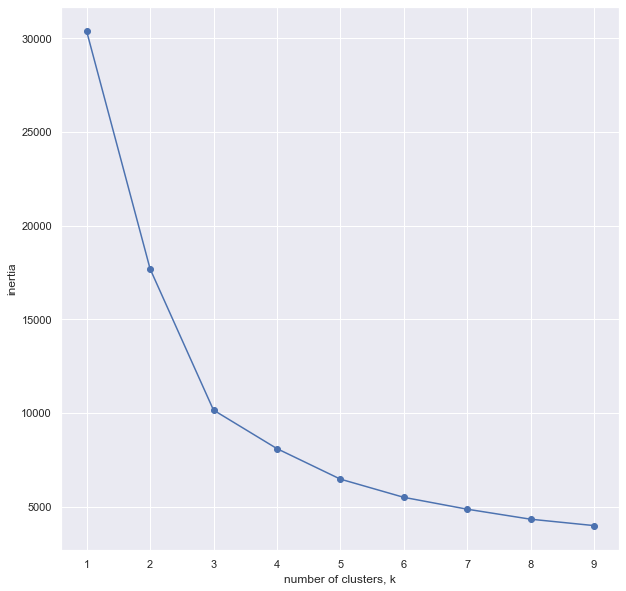

In [88]:
ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    # Fit model to samples
    model.fit(CA_Norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [89]:
# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters = 3, random_state = 0, n_init = 5, max_iter = 200)


# Use fit_predict to fit model and obtain cluster labels: labels
model = model.fit(CA_Norm)

cluster_labels = model.labels_

#Check the Clusters
#The centroids
my_clusters = model.cluster_centers_

inv_clusters = scaler.inverse_transform(X = my_clusters)

In [90]:
#my_real_clusters = pd.DataFrame(my_clusters, columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health',
                                                        #'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'])

#my_real_clusters = pd.DataFrame(my_clusters, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])

my_real_clusters = pd.DataFrame(my_clusters, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health'])

my_real_clusters

,Ratio Motor,Ratio Household,Ratio Health
0,-0.311636,-0.300817,1.069774
1,1.053371,-0.713121,-0.590958
2,-0.986523,1.264171,-0.489272


In [91]:
#my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health',
                                                             #'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'])

#my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])

my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health'])

my_real_clusters_inv

,Ratio Motor,Ratio Household,Ratio Health
0,0.357279,0.174836,0.347183
1,0.690725,0.095893,0.163224
2,0.192417,0.474483,0.174488


In [92]:
my_clusters = pd.DataFrame(model.cluster_centers_)
my_clusters

,0,1,2
0,-0.311636,-0.300817,1.069774
1,1.053371,-0.713121,-0.590958
2,-0.986523,1.264171,-0.489272


In [93]:
model.labels_

array([1, 2, 2, ..., 1, 0, 1])

In [94]:
a = model.labels_
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 3432, 1: 3755, 2: 2935}

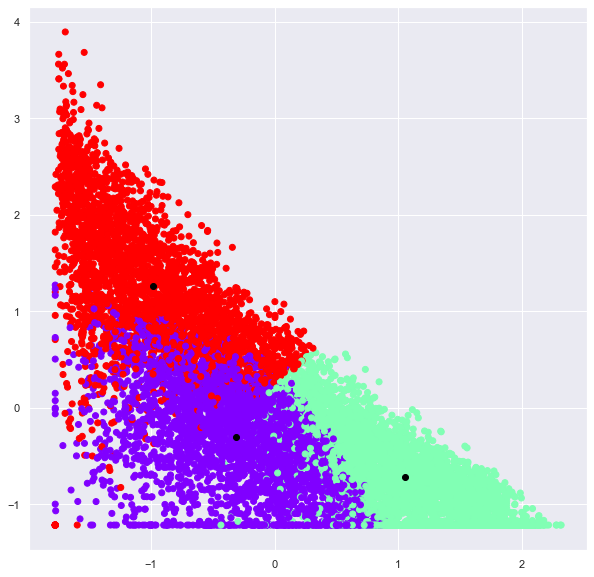

In [95]:
plt.scatter(CA_Norm.iloc[:, 0].values, CA_Norm.iloc[:, 1].values, c=model.labels_, cmap='rainbow')
# add centroids
plt.scatter(my_real_clusters.iloc[:, 0].values, my_real_clusters.iloc[:, 1].values, c='black')

plt.show()

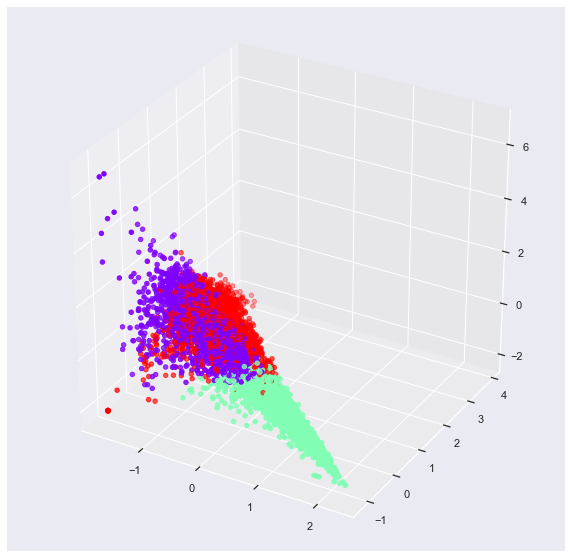

In [96]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = CA_Norm.iloc[:, 0].values
y = CA_Norm.iloc[:, 1].values
z = CA_Norm.iloc[:, 2].values

c1 = my_clusters.iloc[:, 0]
c2 = my_clusters.iloc[:, 1]
c3 = my_clusters.iloc[:, 2]

ax.scatter(x, y, z, cmap='rainbow', marker='o',  c=model.labels_)
ax.scatter(c1, c2, c3, c = 'black', marker = 'o')

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

Silhouette

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n = 10
for n_clusters in range(2,n):
    """
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(CA_Norm) + (n_clusters + 1) * 10])
    
    """
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,
                       random_state=0,
                       n_init = 5,
                       max_iter = 200).fit(CA_Norm)
    
    cluster_labels = clusterer.labels_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(CA_Norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    """
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(CA_Norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
"""

For n_clusters = 2 The average silhouette_score is : 0.3818788853319167
For n_clusters = 3 The average silhouette_score is : 0.4236460563277549
For n_clusters = 4 The average silhouette_score is : 0.3794840527707247
For n_clusters = 5 The average silhouette_score is : 0.3514924675495437
For n_clusters = 6 The average silhouette_score is : 0.3636880259863281
For n_clusters = 7 The average silhouette_score is : 0.3456145520085629
For n_clusters = 8 The average silhouette_score is : 0.3211218825579122
For n_clusters = 9 The average silhouette_score is : 0.32284283225779153


In [98]:
df_product['Labels 3'] = model.labels_

## Hierarchical cluster

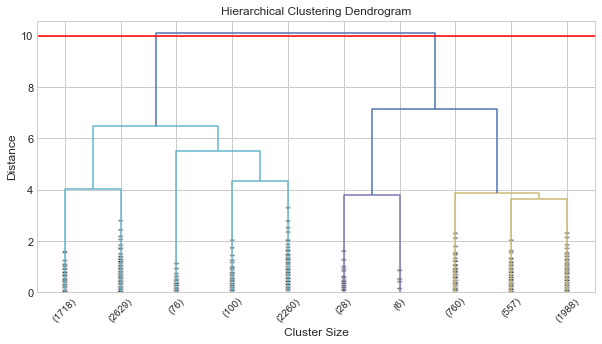

In [99]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from pylab import rcParams

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
# Scipy generate dendrograms
Z = linkage(CA_Norm, method='complete')

#Complete: The distance between two clusters is the longest distance between two points in each cluster.

hierarchy.set_link_color_palette(['c', 'm', 'y', 'g','b','r','k'])

dendrogram(Z,
          truncate_mode='lastp',
          p=10,
          orientation='top',
          leaf_rotation=45,
          leaf_font_size=10,
          show_contracted=True,
          show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=10, color = 'red')
plt.show()

Agglomerative Hierarchical clustering Technique: 
In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

In [100]:
Hclustering = AgglomerativeClustering(n_clusters= 3,
                                      affinity= 'euclidean',
                                      linkage= 'ward')

#Replace the test with proper data
my_HC = Hclustering.fit(CA_Norm)

my_labels = pd.DataFrame(my_HC.labels_)
my_labels.columns =  ['Labels']


# Do the necessary transformations
#affinity = pd.DataFrame(pd.concat([pd.DataFrame(CA_Norm), my_labels], axis = 1),
                        #columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 
                                   #'Premiums in LOB:  Life','Premiums in LOB: Work Compensations', 'Labels'])

#affinity = pd.DataFrame(pd.concat([pd.DataFrame(CA_Norm), my_labels], axis = 1),
                        #columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations', 'Labels'])

affinity = pd.DataFrame(pd.concat([pd.DataFrame(CA_Norm), my_labels], axis = 1),
                        columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Labels'])

#to_revert = affinity.groupby('Labels')['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 
                                       #'Premiums in LOB:  Life','Premiums in LOB: Work Compensations'].mean()

#to_revert = affinity.groupby('Labels')['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'].mean()

to_revert = affinity.groupby('Labels')['Ratio Motor', 'Ratio Household', 'Ratio Health'].mean()

#print(to_revert)

#final_result = pd.DataFrame(scaler.inverse_transform(X = to_revert), columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 
                                                                                #'Premiums in LOB: Health', 'Premiums in LOB:  Life',
                                                                                #'Premiums in LOB: Work Compensations'])

#final_result = pd.DataFrame(scaler.inverse_transform(X = to_revert), columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])

final_result = pd.DataFrame(scaler.inverse_transform(X = to_revert), columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health'])
                            
final_result

,Ratio Motor,Ratio Household,Ratio Health
0,0.640039,0.101331,0.198848
1,0.213332,0.439955,0.190023
2,0.275269,0.184749,0.405089


## DBSCAN

1
[[    0]
 [10122]]


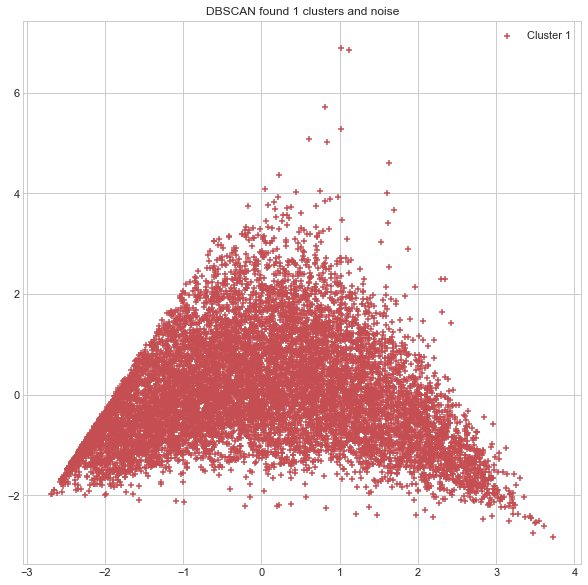

In [101]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps= 50,
            min_samples=10).fit(CA_Norm)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)


unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
# table results: -1 is noise, get two clusters
# biggest cluster: 8904, decrease radius/eps to 0.5 --> 4 clusters
# try even smaller radius: 0.25 --> even more noise: 4670 and a few clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(cluster_Norm)
pca_2d = pca.transform(cluster_Norm)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    #elif db.labels_[i] == 1:
        #c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    #elif db.labels_[i] == 2:
        #c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    #elif db.labels_[i] == 3:
        #c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    #elif db.labels_[i] == 4:
        #c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    #elif db.labels_[i] == 5:
        #c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c3], ['Cluster 1','Noise'])
plt.title('DBSCAN found 1 clusters and noise')
plt.show()

#this method is not good for continuous values, that's the product variables case.

## SOM

In [102]:
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

CA_Norm = scaler.fit_transform(df_product[['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations']])
CA_Norm = pd.DataFrame(CA_Norm, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])

X = CA_Norm.values

#names = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 'Premiums in LOB:  Life',
         #'Premiums in LOB: Work Compensations']
    
names = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations']

sm = SOMFactory().build(data = X,
               mapsize=(10,10),
               normalization = 'var',
               initialization='pca',
               component_names = names,
               lattice='hexa',
               training ='seq' )#'seq','batch'

sm.train(n_job=4,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)

 Training...
 pca_linear_initialization took: 0.014000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 30

 epoch: 1 ---> elapsed time:  0.119000, quantization error: 1.023453

 epoch: 2 ---> elapsed time:  0.111000, quantization error: 1.492457

 epoch: 3 ---> elapsed time:  0.110000, quantization error: 1.364150

 epoch: 4 ---> elapsed time:  0.113000, quantization error: 1.342033

 epoch: 5 ---> elapsed time:  0.119000, quantization error: 1.323645

 epoch: 6 ---> elapsed time:  0.114000, quantization error: 1.305982

 epoch: 7 ---> elapsed time:  0.113000, quantization error: 1.288624

 epoch: 8 ---> elapsed time:  0.110000, quantization error: 1.271258

 epoch: 9 ---> elapsed time:  0.118000, quantization error: 1.253457

 epoch: 10 ---> elapsed time:  0.110000, quantization error: 1.235511

 epoch: 11 ---> elapsed time:  0.112000, quantization error: 1.217575

 epoch: 12 ---> elapsed time:  0.112000, quantization error: 1.199686

 epoch: 13 --

 epoch: 84 ---> elapsed time:  0.118000, quantization error: 0.837581

 epoch: 85 ---> elapsed time:  0.116000, quantization error: 0.837581

 epoch: 86 ---> elapsed time:  0.115000, quantization error: 0.837581

 epoch: 87 ---> elapsed time:  0.115000, quantization error: 0.837581

 epoch: 88 ---> elapsed time:  0.116000, quantization error: 0.837581

 epoch: 89 ---> elapsed time:  0.113000, quantization error: 0.837581

 epoch: 90 ---> elapsed time:  0.114000, quantization error: 0.837581

 epoch: 91 ---> elapsed time:  0.123000, quantization error: 0.837581

 epoch: 92 ---> elapsed time:  0.115000, quantization error: 0.837581

 epoch: 93 ---> elapsed time:  0.111000, quantization error: 0.837581

 epoch: 94 ---> elapsed time:  0.114000, quantization error: 0.837581

 epoch: 95 ---> elapsed time:  0.111000, quantization error: 0.837581

 epoch: 96 ---> elapsed time:  0.113000, quantization error: 0.837581

 epoch: 97 ---> elapsed time:  0.113000, quantization error: 0.837581

 epoch

In [103]:
final_clusters = pd.DataFrame(sm._data, columns = names)

my_labels = pd.DataFrame(sm._bmu[0])

final_clusters = pd.concat([final_clusters, my_labels], axis = 1)

#final_clusters.columns = ['Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health', 'Premiums in LOB:  Life',
                          #'Premiums in LOB: Work Compensations', 'Lables']
    
final_clusters.columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations', 'Lables']

#final_clusters

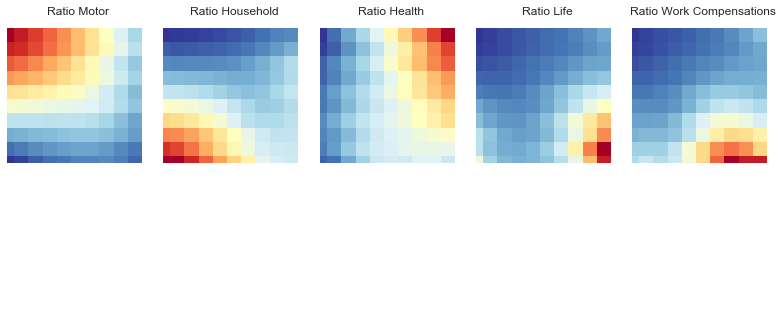

In [104]:
from sompy.visualization.mapview import View2DPacked
view2D  = View2DPacked(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)
plt.show()

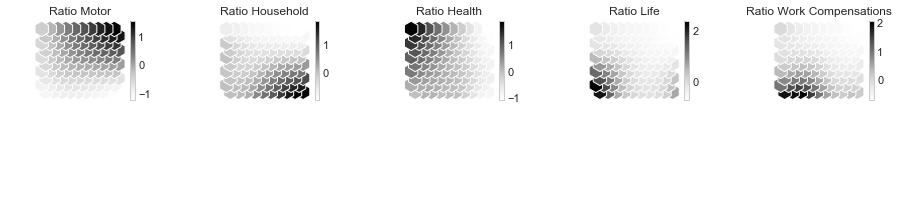

In [105]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)
plt.show()

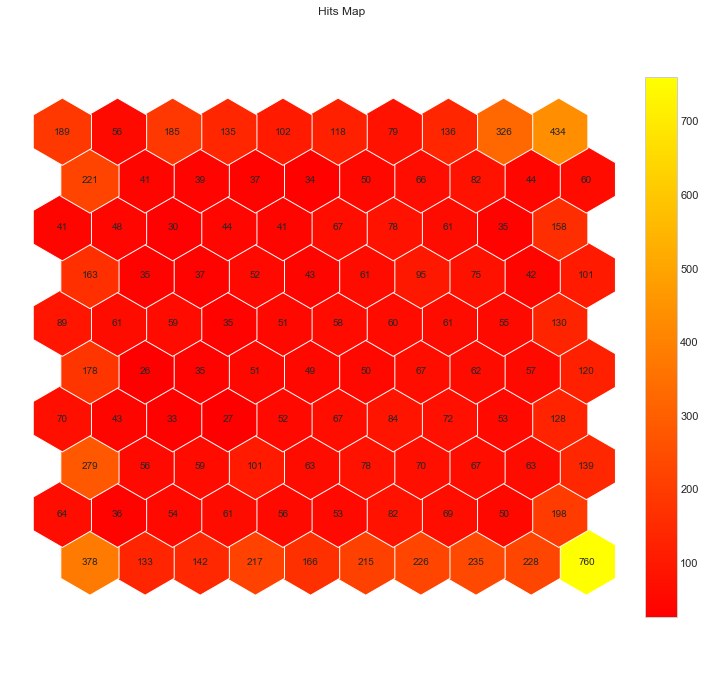

In [106]:
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)

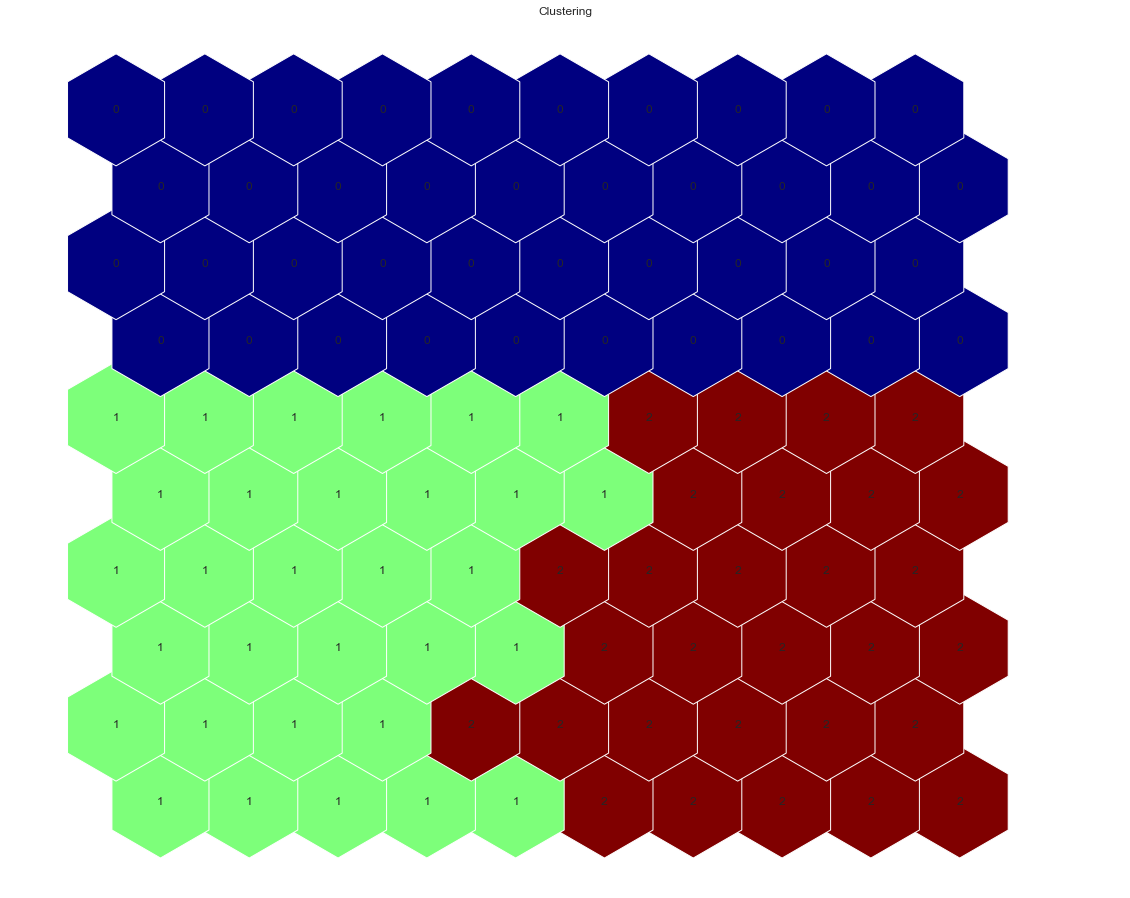

In [107]:
# K-Means Clustering --> better with hierartical 
from sompy.visualization.hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(20,20,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

## Mean-shift


Mean Shift is a hierarchical clustering algorithm.
As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand.

How it works:

- Define a window (bandwidth of the kernel) and place the window on a data point.
- Calculate the mean for all the points in the window.
- Move the center of the window to the location of the mean.
-  Repeat steps 2 and 3 until there is convergence

In [108]:
from sklearn.cluster import MeanShift, estimate_bandwidth

cluster_Norm = scaler.fit_transform(df_product[['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations']])

CA_Norm = pd.DataFrame(cluster_Norm, columns = ['Ratio Motor', 'Ratio Household', 'Ratio Health', 'Ratio Life', 'Ratio Work Compensations'])

to_MS = CA_Norm

# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(to_MS, quantile=0.2, n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.15,
               bin_seeding=True)

ms.fit(to_MS)

labels = ms.labels_


cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("The number of clusters is: ", n_clusters_) # 12 clusters 


#Values
scaler.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

The number of clusters is:  11
[[   0 9440]
 [   1  210]
 [   2   74]
 [   3  206]
 [   4   89]
 [   5    2]
 [   6    1]
 [   7    1]
 [   8   15]
 [   9   83]
 [  10    1]]


In [109]:
# lets check our are they distributed

pca = PCA(n_components=3).fit(to_MS)
pca_2d = pca.transform(to_MS)

print(pca_2d.shape[0])

10122


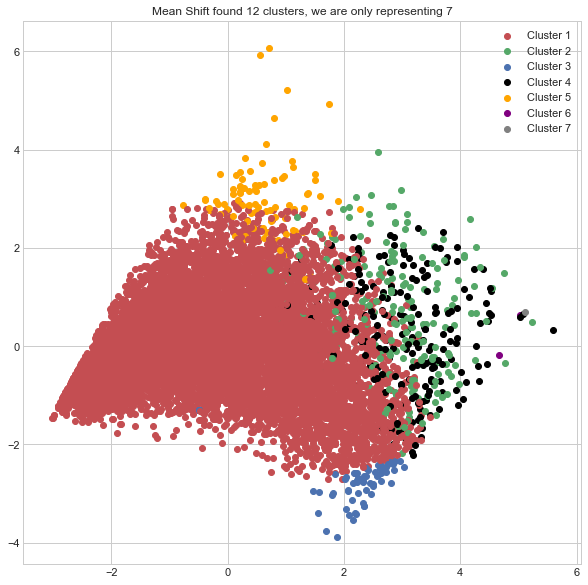

In [110]:
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='o')
    elif labels[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='black',marker='o')
    elif labels[i] == 4:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange',marker='o')
    elif labels[i] == 5:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='purple',marker='o') 
    elif labels[i] == 6:
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='gray',marker='o')
    

plt.legend([c1, c2, c3, c4, c5, c6, c7], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
                                         'Cluster 6', 'Cluster 7'])
plt.title('Mean Shift found 12 clusters, we are only representing 7')
plt.show()

## Costumers Variables

In [111]:
df_costumers.columns

Index(['First Policy´s Year', 'Educational Degree', 'Gross Monthly Salary',
       'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Age As Client',
       'Anual Salary', 'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

We have four choices here:

- 'Educational Degree', 'Gross Monthly Salary','Geographic Living Area', 'Has Children (Y=1)', 'Customer Monetary Value', 'Costumer Annual Profit'

- 'Educational Degree', 'Gross Monthly Salary','Geographic Living Area', 'Has Children (Y=1)', 'Customer Monetary Value', 'Acquisition Cost'

- 'Educational Degree', 'Gross Monthly Salary','Geographic Living Area', 'Has Children (Y=1)', 'Claims Rate', 'Costumer Annual Profit'

- 'Educational Degree', 'Gross Monthly Salary','Geographic Living Area', 'Has Children (Y=1)', 'Claims Rate', 'Acquisition Cost'


In [112]:
prof_1 = df_costumers[['Educational Degree', 'Gross Monthly Salary','Geographic Living Area', 'Has Children (Y=1)', 
             'Customer Monetary Value', 'Costumer Annual Profit']]

prof_1_1 = df_costumers[['Educational Degree', 'Geographic Living Area', 'Has Children (Y=1)']]

prof_1_1_1 = df_costumers[['Educational Degree', 'Geographic Living Area']]

prof_1_1_1_1 = df_costumers[['Educational Degree', 'Has Children (Y=1)']]

prof_1_1_1_1_1 = df_costumers[['Geographic Living Area', 'Has Children (Y=1)']]

In [113]:
#CA_Norm = scaler.fit_transform(prof_1_1)
#CA_Norm = scaler.fit_transform(prof_1_1_1)
CA_Norm = scaler.fit_transform(prof_1_1_1_1)
#CA_Norm = scaler.fit_transform(prof_1_1_1_1_1)

#CA_Norm = scaler.fit_transform(prof_2)
#CA_Norm = scaler.fit_transform(prof_3)
#CA_Norm = scaler.fit_transform(prof_4)

#CA_Norm = pd.DataFrame(CA_Norm, columns = prof_1_1.columns)
#CA_Norm = pd.DataFrame(CA_Norm, columns = prof_1_1_1.columns)
CA_Norm = pd.DataFrame(CA_Norm, columns = prof_1_1_1_1.columns)
#CA_Norm = pd.DataFrame(CA_Norm, columns = prof_1_1_1_1_1.columns)

K-Modes

In [114]:
from kmodes.kmodes import KModes

km = KModes(n_clusters = 3, init='random', n_init = 10, verbose = 1)

clusters = km.fit_predict(CA_Norm)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4912.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5404.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 208, cost: 3316.0
Run 3, iteration: 2/100, moves: 0, cost: 3316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1369, cost: 4873.0
Run 4, iteration: 2/100, moves: 0, cost: 4873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 580, cost: 5944.0
Run 5, iteration: 2/100, moves: 0, cost: 5944.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1388, cost: 2965.0
Run 6, iteration: 2/100, moves: 0, cost: 2965.0
Init: initializing centroids
I

In [115]:
# Print the cluster centroids
my_clusters = km.cluster_centroids_
my_clusters


array([[-0.60194224,  0.64333865],
       [ 0.65328219, -1.5543913 ],
       [ 0.65328219,  0.64333865]])

In [116]:
inv_clusters = scaler.inverse_transform(X = my_clusters)
inv_clusters

array([[2., 1.],
       [3., 0.],
       [3., 1.]])

In [117]:
my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = prof_1_1_1_1.columns)

my_real_clusters_inv

,Educational Degree,Has Children (Y=1)
0,2.0,1.0
1,3.0,0.0
2,3.0,1.0


In [118]:
prof_1_1_1_1['Labels 1'] = clusters

a = prof_1_1_1_1['Labels 1'].values

unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 4824, 1: 1947, 2: 3351}

Silhouette

In [119]:
n = 6
for n_clusters in range(2,n):

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    km = KModes(n_clusters = n_clusters, init='random', n_init = 10, verbose = 1).fit(prof_1_1_1_1)
    
    cluster_labels = prof_1_1_1_1['Labels 1'].values
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(prof_1_1_1_1, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13665.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 372, cost: 6859.0
Run 2, iteration: 2/100, moves: 0, cost: 6859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1947, cost: 9667.0
Run 3, iteration: 2/100, moves: 0, cost: 9667.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 9667.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 6859.0
In

Once these variables are categorical we can also try to apply the DBCSAN method.

In [120]:
db = DBSCAN(eps= 50,
            min_samples=10).fit(CA_Norm)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

1


[[    0]
 [10122]]


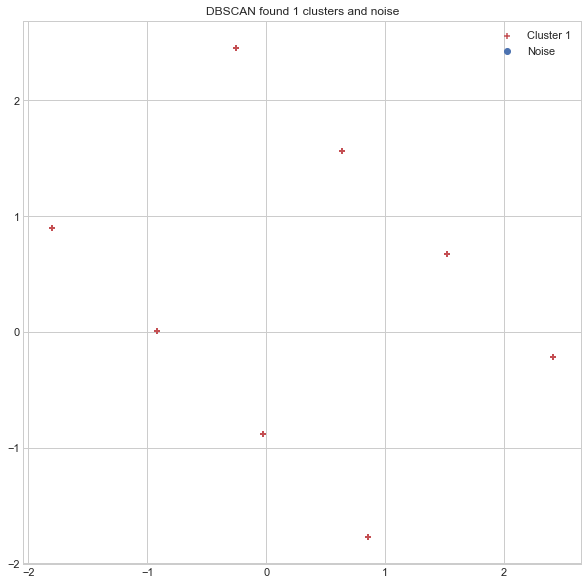

In [121]:
unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))
# table results: -1 is noise, get two clusters
# biggest cluster: 8904, decrease radius/eps to 0.5 --> 4 clusters
# try even smaller radius: 0.25 --> even more noise: 4670 and a few clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(CA_Norm)
pca_2d = pca.transform(CA_Norm)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    #elif db.labels_[i] == 1:
        #c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    #elif db.labels_[i] == 2:
        #c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    #elif db.labels_[i] == 3:
        #c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    #elif db.labels_[i] == 4:
        #c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    #elif db.labels_[i] == 5:
        #c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c3], ['Cluster 1','Noise'])
plt.title('DBSCAN found 1 clusters and noise')
plt.show()

K means

In [122]:
df_costumers.columns

Index(['First Policy´s Year', 'Educational Degree', 'Gross Monthly Salary',
       'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Age As Client',
       'Anual Salary', 'Costumer Annual Profit', 'Acquisition Cost'],
      dtype='object')

In [138]:
prof_2_2 = df_costumers[['Gross Monthly Salary','Age As Client']]



#prof_2_2 = df_costumers[['Gross Monthly Salary','Age As Client', 'Customer Monetary Value']]

#prof_2_2 = df_costumers[['Gross Monthly Salary','Age As Client', 'Claims Rate']]

#prof_2_2 = df_costumers[['Gross Monthly Salary','Age As Client', 'Costumer Annual Profit']]

#prof_2_2 = df_costumers[['Gross Monthly Salary','Age As Client', 'Acquisition Cost']]

#prof_2_3 = df_costumers[['Gross Monthly Salary', 'Age As Client', 'Customer Monetary Value', 'Costumer Annual Profit']]

#prof_2_3 = df_costumers[['Gross Monthly Salary', 'Age As Client', 'Customer Monetary Value', 'Acquisition Cost']]

#prof_2_3 = df_costumers[['Gross Monthly Salary', 'Age As Client', 'Claims Rate', 'Costumer Annual Profit']]

#prof_2_3 = df_costumers[['Gross Monthly Salary', 'Age As Client', 'Claims Rate', 'Acquisition Cost']]

In [139]:
cluster_Norm = scaler.fit_transform(prof_2_2)

CA_Norm = pd.DataFrame(cluster_Norm, columns = prof_2_2.columns)

Elbow graph

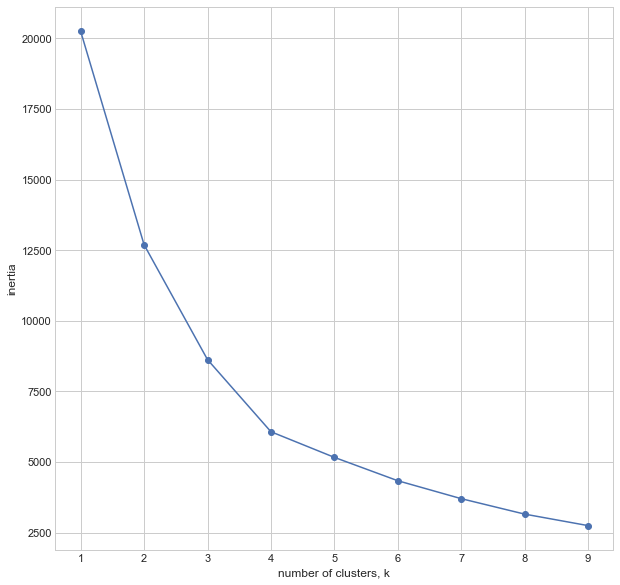

In [140]:
ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    # Fit model to samples
    model.fit(CA_Norm)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#Elbow Graph says 4 clusters

In [141]:
# Create a KMeans model with 4 clusters: model

model = KMeans(n_clusters = 4, random_state = 0, n_init = 5, max_iter = 200)


# Use fit_predict to fit model and obtain cluster labels: labels
model = model.fit(CA_Norm)

cluster_labels = model.labels_

#Check the Clusters
#The centroids
my_clusters = model.cluster_centers_

inv_clusters = scaler.inverse_transform(X = my_clusters)

In [142]:
my_real_clusters = pd.DataFrame(my_clusters, columns = prof_2_2.columns)
my_real_clusters

my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = prof_2_2.columns)

my_real_clusters_inv

prof_2_2['Labels 2'] = cluster_labels

my_real_clusters_inv

,Gross Monthly Salary,Age As Client
0,1619.887636,36.014700
1,3421.499588,24.159207
2,3258.863810,35.675662
3,1709.745297,24.664762


In [143]:
a = model.labels_
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 2306, 1: 2426, 2: 2625, 3: 2765}

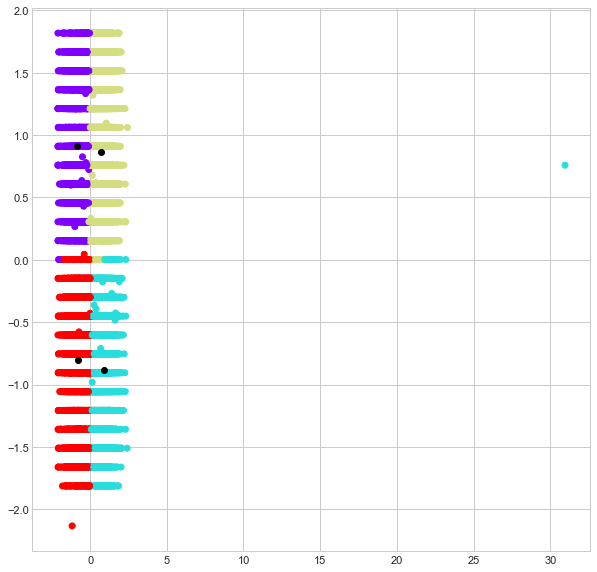

In [144]:
plt.scatter(CA_Norm.iloc[:, 0].values, CA_Norm.iloc[:, 1].values, c=model.labels_, cmap='rainbow')
# add centroids
plt.scatter(my_real_clusters.iloc[:, 0].values, my_real_clusters.iloc[:, 1].values, c='black')

plt.show()

Silhouette


In [130]:
n = 7
for n_clusters in range(2,n):
    """
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(CA_Norm) + (n_clusters + 1) * 10])
    
    """
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,
                       random_state=0,
                       n_init = 5,
                       max_iter = 200).fit(CA_Norm)
    
    cluster_labels = clusterer.labels_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(CA_Norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.36338911412034053
For n_clusters = 3 The average silhouette_score is : 0.37259158485048743
For n_clusters = 4 The average silhouette_score is : 0.38923264519225637
For n_clusters = 5 The average silhouette_score is : 0.3720570986148457
For n_clusters = 6 The average silhouette_score is : 0.36495072345954815


In [131]:
model = KMeans(n_clusters = 2, random_state = 0, n_init = 5, max_iter = 200)


# Use fit_predict to fit model and obtain cluster labels: labels
model = model.fit(CA_Norm)

cluster_labels = model.labels_

#Check the Clusters
#The centroids
my_clusters = model.cluster_centers_

inv_clusters = scaler.inverse_transform(X = my_clusters)

In [132]:
my_real_clusters = pd.DataFrame(my_clusters, columns = prof_2_2.columns)

my_real_clusters_inv = pd.DataFrame(inv_clusters, columns = prof_2_2.columns)

my_real_clusters_inv

ValueError: Shape of passed values is (2, 2), indices imply (2, 3)

In [133]:
a = model.labels_
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 5158, 1: 4964}

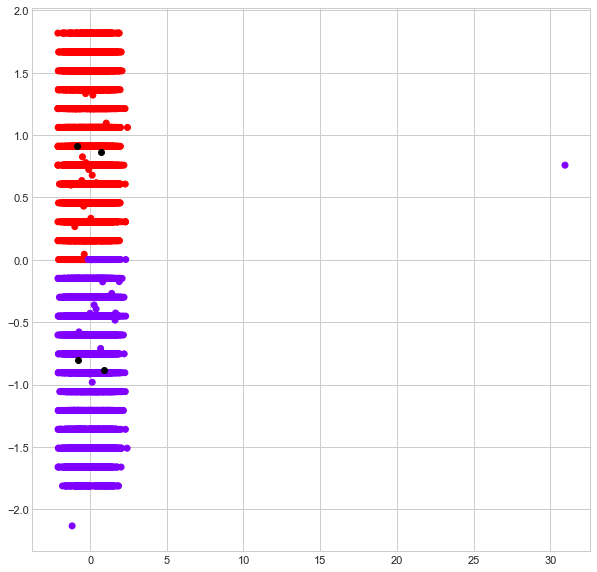

In [134]:
plt.scatter(CA_Norm.iloc[:, 0].values, CA_Norm.iloc[:, 1].values, c=model.labels_, cmap='rainbow')
# add centroids
plt.scatter(my_real_clusters.iloc[:, 0].values, my_real_clusters.iloc[:, 1].values, c='black')

plt.show()

IndexError: single positional indexer is out-of-bounds

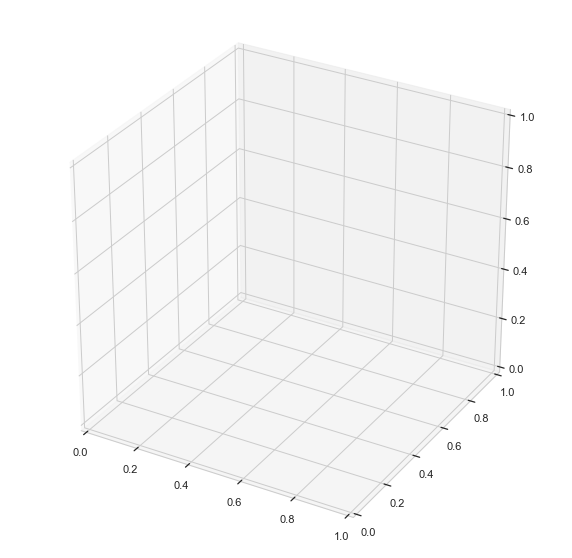

In [135]:
#Only to run if we've more than 2 dimensions.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = CA_Norm.iloc[:, 0].values
y = CA_Norm.iloc[:, 1].values
z = CA_Norm.iloc[:, 2].values

c1 = my_real_clusters.iloc[:, 0]
c2 = my_real_clusters.iloc[:, 1]
c3 = my_real_clusters.iloc[:, 2]

ax.scatter(x, y, z, cmap='rainbow', marker='o',  c=model.labels_)
ax.scatter(c1, c2, c3, c = 'black', marker = 'o')

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

## Merge the clusters

In [392]:
df_Norm = scaler.fit_transform(df_costumers)

df_norm = pd.DataFrame(df_Norm, columns = df_costumers.columns)

df_all = pd.concat([df_norm, prof_1_1_1_1['Labels 1'], prof_2_2['Labels 2']], axis = 1)

df_all

,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Age As Client,Anual Salary,Costumer Annual Profit,Acquisition Cost,Labels 1,Labels 2
0,-0.153734,-0.601942,-0.314191,-1.350489,0.643339,0.103390,-0.119960,0.153734,-0.314191,-0.205955,-0.149584,0.0,0.0
1,-0.758775,-0.601942,-1.765959,1.019286,0.643339,-0.158348,0.129077,0.758775,-1.765959,0.309537,0.561359,0.0,0.0
2,0.753827,-1.857167,-0.217407,0.229361,-1.554391,0.166614,-0.157486,-0.753827,-0.217407,-0.048324,-0.285028,1.0,3.0
3,0.602567,0.653282,-1.357528,1.019286,0.643339,-0.100010,0.084728,-0.602567,-1.357528,-0.342243,-0.428606,2.0,3.0
4,-0.002474,0.653282,-0.714879,1.019286,0.643339,-0.073320,0.054025,0.002474,-0.714879,-0.282249,-0.234766,2.0,3.0
5,-0.002474,-0.601942,0.062301,1.019286,0.643339,-0.103762,0.088140,0.002474,0.062301,-0.366526,-0.303908,0.0,2.0
6,-1.061296,-0.601942,1.549878,1.019286,-1.554391,-0.125065,0.105197,1.061296,1.549878,0.100568,0.445081,0.0,2.0
7,0.300047,-0.601942,-0.734236,1.019286,0.643339,-0.165391,0.132489,-0.300047,-0.734236,0.307185,0.174906,0.0,3.0
8,-0.758775,0.653282,-0.619062,-1.350489,0.643339,0.090898,-0.130194,0.758775,-0.619062,-0.361380,-0.143720,2.0,0.0
9,-1.515076,0.653282,1.297271,-1.350489,-1.554391,-0.152327,0.129077,1.515076,1.297271,-0.012194,0.465664,1.0,2.0


In [393]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 0)].mean()

First Policy´s Year        0.052657
Educational Degree        -0.013689
Gross Monthly Salary       0.023666
Geographic Living Area    -0.047782
Has Children (Y=1)        -0.001080
Customer Monetary Value   -0.008789
Claims Rate                0.004261
Age As Client             -0.052657
Anual Salary               0.023666
Costumer Annual Profit     0.034549
Acquisition Cost           0.018597
Labels 1                   0.000000
Labels 2                   0.000000
dtype: float64

In [394]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 1)].mean()

First Policy´s Year        0.040214
Educational Degree        -0.035402
Gross Monthly Salary      -0.000248
Geographic Living Area    -0.043760
Has Children (Y=1)        -0.055112
Customer Monetary Value   -0.087993
Claims Rate                0.094620
Age As Client             -0.040214
Anual Salary              -0.000248
Costumer Annual Profit    -0.009218
Acquisition Cost          -0.012211
Labels 1                   0.000000
Labels 2                   1.000000
dtype: float64

In [395]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 2)].mean()

First Policy´s Year        0.015661
Educational Degree         0.021779
Gross Monthly Salary       0.005612
Geographic Living Area    -0.004328
Has Children (Y=1)         0.032101
Customer Monetary Value    0.020599
Claims Rate               -0.017818
Age As Client             -0.015661
Anual Salary               0.005612
Costumer Annual Profit    -0.012866
Acquisition Cost          -0.018942
Labels 1                   0.000000
Labels 2                   2.000000
dtype: float64

In [396]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 3)].mean()

First Policy´s Year       -0.029552
Educational Degree        -0.025055
Gross Monthly Salary       0.003944
Geographic Living Area     0.043782
Has Children (Y=1)        -0.000927
Customer Monetary Value    0.025689
Claims Rate               -0.024376
Age As Client              0.029552
Anual Salary               0.003944
Costumer Annual Profit     0.040103
Acquisition Cost           0.046737
Labels 1                   0.000000
Labels 2                   3.000000
dtype: float64

In [397]:
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 0)].mean()

First Policy´s Year       -0.103859
Educational Degree         0.103697
Gross Monthly Salary       0.055374
Geographic Living Area     0.101265
Has Children (Y=1)         0.013719
Customer Monetary Value    0.038355
Claims Rate               -0.033511
Age As Client              0.103859
Anual Salary               0.055374
Costumer Annual Profit     0.014417
Acquisition Cost           0.039511
Labels 1                   1.000000
Labels 2                   0.000000
dtype: float64

In [398]:
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 1)].mean()

First Policy´s Year        0.001411
Educational Degree         0.032533
Gross Monthly Salary       0.012567
Geographic Living Area    -0.051864
Has Children (Y=1)        -0.048292
Customer Monetary Value    0.017973
Claims Rate               -0.019046
Age As Client             -0.001411
Anual Salary               0.012567
Costumer Annual Profit    -0.019124
Acquisition Cost          -0.016793
Labels 1                   1.000000
Labels 2                   1.000000
dtype: float64

In [399]:
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 2)].mean()

First Policy´s Year       -0.029801
Educational Degree        -0.000408
Gross Monthly Salary      -0.002498
Geographic Living Area     0.104636
Has Children (Y=1)        -0.020242
Customer Monetary Value    0.010150
Claims Rate               -0.013434
Age As Client              0.029801
Anual Salary              -0.002498
Costumer Annual Profit    -0.024722
Acquisition Cost          -0.020381
Labels 1                   1.000000
Labels 2                   2.000000
dtype: float64

In [400]:
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 3)].mean()

First Policy´s Year        0.180631
Educational Degree         0.025670
Gross Monthly Salary      -0.060753
Geographic Living Area    -0.003459
Has Children (Y=1)         0.088123
Customer Monetary Value    0.039697
Claims Rate               -0.042879
Age As Client             -0.180631
Anual Salary              -0.060753
Costumer Annual Profit    -0.054145
Acquisition Cost          -0.098808
Labels 1                   1.000000
Labels 2                   3.000000
dtype: float64

In [401]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 0)].mean()

First Policy´s Year        0.016624
Educational Degree        -0.054436
Gross Monthly Salary      -0.038051
Geographic Living Area    -0.029272
Has Children (Y=1)         0.004265
Customer Monetary Value    0.019529
Claims Rate               -0.016802
Age As Client             -0.016624
Anual Salary              -0.038051
Costumer Annual Profit     0.000071
Acquisition Cost          -0.010658
Labels 1                   2.000000
Labels 2                   0.000000
dtype: float64

In [402]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 1)].mean()

First Policy´s Year        0.019681
Educational Degree        -0.013947
Gross Monthly Salary      -0.000461
Geographic Living Area    -0.025200
Has Children (Y=1)         0.088430
Customer Monetary Value    0.015424
Claims Rate               -0.016924
Age As Client             -0.019681
Anual Salary              -0.000461
Costumer Annual Profit    -0.027795
Acquisition Cost          -0.029050
Labels 1                   2.000000
Labels 2                   1.000000
dtype: float64

In [403]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 2)].mean()

First Policy´s Year       -0.055115
Educational Degree         0.017985
Gross Monthly Salary       0.016903
Geographic Living Area    -0.014602
Has Children (Y=1)        -0.032426
Customer Monetary Value   -0.069612
Claims Rate                0.059609
Age As Client              0.055115
Anual Salary               0.016903
Costumer Annual Profit    -0.032091
Acquisition Cost          -0.013533
Labels 1                   2.000000
Labels 2                   2.000000
dtype: float64

In [404]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 3)].mean()

First Policy´s Year       -0.057658
Educational Degree         0.022111
Gross Monthly Salary      -0.020263
Geographic Living Area     0.034493
Has Children (Y=1)         0.009778
Customer Monetary Value    0.020454
Claims Rate               -0.017371
Age As Client              0.057658
Anual Salary              -0.020263
Costumer Annual Profit     0.018226
Acquisition Cost           0.031552
Labels 1                   2.000000
Labels 2                   3.000000
dtype: float64

In [405]:
df_replacement = df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 0)]
df_replacement['Labels 1'] = 2
df_replacement['Labels 2'] = 3
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 0)] = df_replacement

In [407]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 3)].mean()

First Policy´s Year       -0.064534
Educational Degree         0.034254
Gross Monthly Salary      -0.009005
Geographic Living Area     0.044431
Has Children (Y=1)         0.010364
Customer Monetary Value    0.023118
Claims Rate               -0.019773
Age As Client              0.064534
Anual Salary              -0.009005
Costumer Annual Profit     0.017659
Acquisition Cost           0.032737
Labels 1                   2.000000
Labels 2                   3.000000
dtype: float64

In [408]:
df_replacement = df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 3)]
df_replacement['Labels 1'] = 2
df_replacement['Labels 2'] = 1
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 3)] = df_replacement

In [409]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 1)].mean()

First Policy´s Year        0.058293
Educational Degree        -0.004443
Gross Monthly Salary      -0.014925
Geographic Living Area    -0.019984
Has Children (Y=1)         0.088356
Customer Monetary Value    0.021247
Claims Rate               -0.023151
Age As Client             -0.058293
Anual Salary              -0.014925
Costumer Annual Profit    -0.034116
Acquisition Cost          -0.045785
Labels 1                   2.000000
Labels 2                   1.000000
dtype: float64

In [410]:
df_replacement = df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 2)]
df_replacement['Labels 1'] = 2
df_replacement['Labels 2'] = 3
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 2)] = df_replacement

In [411]:
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 3)].mean()

First Policy´s Year       -0.051772
Educational Degree         0.021518
Gross Monthly Salary      -0.006614
Geographic Living Area     0.066552
Has Children (Y=1)        -0.000881
Customer Monetary Value    0.018353
Claims Rate               -0.017444
Age As Client              0.051772
Anual Salary              -0.006614
Costumer Annual Profit     0.002087
Acquisition Cost           0.013220
Labels 1                   2.000000
Labels 2                   3.000000
dtype: float64

In [412]:
df_replacement = df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 2)]
df_replacement['Labels 1'] = 1
df_replacement['Labels 2'] = 1
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 2)] = df_replacement

In [413]:
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 1)].mean()

First Policy´s Year       -0.025256
Educational Degree         0.025670
Gross Monthly Salary       0.014612
Geographic Living Area    -0.034286
Has Children (Y=1)        -0.040807
Customer Monetary Value   -0.023346
Claims Rate                0.018060
Age As Client              0.025256
Anual Salary               0.014612
Costumer Annual Profit    -0.025241
Acquisition Cost          -0.015255
Labels 1                   1.000000
Labels 2                   1.000000
dtype: float64

In [414]:
df_replacement = df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 1)]
df_replacement['Labels 1'] = 0
df_replacement['Labels 2'] = 2
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 1)] = df_replacement

In [415]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 2)].mean()

First Policy´s Year        0.033237
Educational Degree         0.010968
Gross Monthly Salary      -0.002855
Geographic Living Area    -0.010783
Has Children (Y=1)         0.055294
Customer Monetary Value    0.020866
Claims Rate               -0.020017
Age As Client             -0.033237
Anual Salary              -0.002855
Costumer Annual Profit    -0.021627
Acquisition Cost          -0.030009
Labels 1                   0.000000
Labels 2                   2.000000
dtype: float64

In [416]:
df_replacement = df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 0)]
df_replacement['Labels 1'] = 0
df_replacement['Labels 2'] = 2
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 0)] = df_replacement

In [417]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 2)].mean()

First Policy´s Year        0.027933
Educational Degree        -0.009914
Gross Monthly Salary      -0.014093
Geographic Living Area    -0.016686
Has Children (Y=1)         0.039002
Customer Monetary Value    0.020440
Claims Rate               -0.018990
Age As Client             -0.027933
Anual Salary              -0.014093
Costumer Annual Profit    -0.014699
Acquisition Cost          -0.023831
Labels 1                   0.000000
Labels 2                   2.000000
dtype: float64

In [418]:
df_replacement = df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 1)]
df_replacement['Labels 1'] = 0
df_replacement['Labels 2'] = 0
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 1)] = df_replacement

In [419]:
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 0)].mean()

First Policy´s Year        0.047056
Educational Degree        -0.023463
Gross Monthly Salary       0.012901
Geographic Living Area    -0.045972
Has Children (Y=1)        -0.025402
Customer Monetary Value   -0.044442
Claims Rate                0.044935
Age As Client             -0.047056
Anual Salary               0.012901
Costumer Annual Profit     0.014848
Acquisition Cost           0.004729
Labels 1                   0.000000
Labels 2                   0.000000
dtype: float64

In [420]:
labels = df_product['Labels 3']

df_Norm = scaler.fit_transform(df_product)

df_norm = pd.DataFrame(df_Norm, columns = df_product.columns)

df_norm['Labels 3'] = labels

df_all = pd.concat([df_all, df_norm], axis = 1)

df_all

,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Age As Client,Anual Salary,Costumer Annual Profit,...,Positive Health,Positive Life,Positive Work,Costumer Annual Profit,Ratio Motor,Ratio Household,Ratio Health,Ratio Life,Ratio Work Compensations,Labels 3
0,-0.153734,-0.601942,-0.314191,-1.350489,0.643339,0.103390,-0.119960,0.153734,-0.314191,-0.205955,...,-0.082177,0.114607,-0.478499,-0.214249,0.537521,-0.590488,-0.079260,0.318266,-0.466641,1.0
1,-0.758775,-0.601942,-1.765959,1.019286,0.643339,-0.158348,0.129077,0.758775,-1.765959,0.309537,...,-0.181623,3.239804,1.262526,0.302753,-1.426123,1.172239,-0.908092,2.816155,1.139040,2.0
2,0.753827,-1.857167,-0.217407,0.229361,-1.554391,0.166614,-0.157486,-0.753827,-0.217407,-0.048324,...,-0.155178,0.948304,1.123814,-0.056156,-0.634723,0.369247,-0.545905,1.121930,1.442092,2.0
3,0.602567,0.653282,-1.357528,1.019286,0.643339,-0.100010,0.084728,-0.602567,-1.357528,-0.342243,...,0.470221,-0.132704,-0.255116,-0.350936,-0.530606,-0.837029,2.612132,0.111958,-0.082468,0.0
4,-0.002474,0.653282,-0.714879,1.019286,0.643339,-0.073320,0.054025,0.002474,-0.714879,-0.282249,...,0.039256,-0.483645,0.000653,-0.290767,0.428748,-0.817201,0.555123,-0.394901,0.246914,0.0
5,-0.002474,-0.601942,0.062301,1.019286,0.643339,-0.103762,0.088140,0.002474,0.062301,-0.366526,...,-0.187957,-0.733288,-0.658377,-0.375290,1.288449,-1.046391,-0.305298,-0.708996,-0.684388,1.0
6,-1.061296,-0.601942,1.549878,1.019286,-1.554391,-0.125065,0.105197,1.061296,1.549878,0.100568,...,0.492946,-0.570745,-0.294135,0.093172,-0.982602,0.688568,1.472699,-0.600658,-0.341852,0.0
7,0.300047,-0.601942,-0.734236,1.019286,0.643339,-0.165391,0.132489,-0.300047,-0.734236,0.307185,...,-0.088880,0.531455,0.230475,0.300394,-0.657169,1.066684,-0.632117,0.364695,0.117081,2.0
8,-0.758775,0.653282,-0.619062,-1.350489,0.643339,0.090898,-0.130194,0.758775,-0.619062,-0.361380,...,0.131261,-0.695566,-0.615066,-0.370129,0.609787,-1.051941,1.140841,-0.657244,-0.619214,0.0
9,-1.515076,0.653282,1.297271,-1.350489,-1.554391,-0.152327,0.129077,1.515076,1.297271,-0.012194,...,0.338733,-0.050267,0.267348,-0.019920,-0.643786,0.042125,1.175141,-0.011576,0.367856,0.0


In [421]:
df_all['Labels 4'] = df_all['Labels 1']

In [422]:
df_replacement = df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 0)]
df_replacement['Labels 4'] = 0
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 0)] = df_replacement

In [423]:
df_replacement = df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 1)]
df_replacement['Labels 4'] = 1
df_all[(df_all['Labels 1'] == 1) & (df_all['Labels 2'] == 1)] = df_replacement

In [424]:
df_replacement = df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 2)]
df_replacement['Labels 4'] = 2
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 2)] = df_replacement

In [425]:
df_replacement = df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 3)]
df_replacement['Labels 4'] = 3
df_all[(df_all['Labels 1'] == 0) & (df_all['Labels 2'] == 3)] = df_replacement

In [426]:
df_replacement = df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 3)]
df_replacement['Labels 4'] = 4
df_all[(df_all['Labels 1'] == 2) & (df_all['Labels 2'] == 3)] = df_replacement

In [427]:
df_all = df_all.drop(['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life',
                     'Premiums in LOB: Work Compensations','Positive Motor','Positive Household','Positive Health',
                     'Positive Life','Positive Work'], 1)
df_all

,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Age As Client,Anual Salary,Costumer Annual Profit,...,Labels 1,Labels 2,Costumer Annual Profit,Ratio Motor,Ratio Household,Ratio Health,Ratio Life,Ratio Work Compensations,Labels 3,Labels 4
0,-0.153734,-0.601942,-0.314191,-1.350489,0.643339,0.103390,-0.119960,0.153734,-0.314191,-0.205955,...,0.0,0.0,-0.214249,0.537521,-0.590488,-0.079260,0.318266,-0.466641,1.0,0.0
1,-0.758775,-0.601942,-1.765959,1.019286,0.643339,-0.158348,0.129077,0.758775,-1.765959,0.309537,...,0.0,0.0,0.302753,-1.426123,1.172239,-0.908092,2.816155,1.139040,2.0,0.0
2,0.753827,-1.857167,-0.217407,0.229361,-1.554391,0.166614,-0.157486,-0.753827,-0.217407,-0.048324,...,0.0,2.0,-0.056156,-0.634723,0.369247,-0.545905,1.121930,1.442092,2.0,2.0
3,0.602567,0.653282,-1.357528,1.019286,0.643339,-0.100010,0.084728,-0.602567,-1.357528,-0.342243,...,2.0,3.0,-0.350936,-0.530606,-0.837029,2.612132,0.111958,-0.082468,0.0,4.0
4,-0.002474,0.653282,-0.714879,1.019286,0.643339,-0.073320,0.054025,0.002474,-0.714879,-0.282249,...,2.0,3.0,-0.290767,0.428748,-0.817201,0.555123,-0.394901,0.246914,0.0,4.0
5,-0.002474,-0.601942,0.062301,1.019286,0.643339,-0.103762,0.088140,0.002474,0.062301,-0.366526,...,0.0,2.0,-0.375290,1.288449,-1.046391,-0.305298,-0.708996,-0.684388,1.0,2.0
6,-1.061296,-0.601942,1.549878,1.019286,-1.554391,-0.125065,0.105197,1.061296,1.549878,0.100568,...,0.0,2.0,0.093172,-0.982602,0.688568,1.472699,-0.600658,-0.341852,0.0,2.0
7,0.300047,-0.601942,-0.734236,1.019286,0.643339,-0.165391,0.132489,-0.300047,-0.734236,0.307185,...,0.0,3.0,0.300394,-0.657169,1.066684,-0.632117,0.364695,0.117081,2.0,3.0
8,-0.758775,0.653282,-0.619062,-1.350489,0.643339,0.090898,-0.130194,0.758775,-0.619062,-0.361380,...,0.0,2.0,-0.370129,0.609787,-1.051941,1.140841,-0.657244,-0.619214,0.0,2.0
9,-1.515076,0.653282,1.297271,-1.350489,-1.554391,-0.152327,0.129077,1.515076,1.297271,-0.012194,...,2.0,3.0,-0.019920,-0.643786,0.042125,1.175141,-0.011576,0.367856,0.0,4.0


In [428]:
df_all[(df_all['Labels 3'] == 0) & (df_all['Labels 4'] == 0)].mean()

First Policy´s Year         0.029995
Educational Degree         -0.008303
Gross Monthly Salary       -0.076172
Geographic Living Area     -0.082333
Has Children (Y=1)         -0.007841
Customer Monetary Value    -0.018664
Claims Rate                 0.024279
Age As Client              -0.029995
Anual Salary               -0.076172
Costumer Annual Profit      0.055898
Acquisition Cost            0.055556
Labels 1                    0.000000
Labels 2                    0.000000
Costumer Annual Profit      0.057778
Ratio Motor                -0.008016
Ratio Household             0.014230
Ratio Health               -0.045389
Ratio Life                 -0.029755
Ratio Work Compensations    0.025558
Labels 3                    0.000000
Labels 4                    0.000000
dtype: float64

In [429]:
df_all[(df_all['Labels 3'] == 0) & (df_all['Labels 4'] == 1)].mean()

First Policy´s Year         0.002439
Educational Degree          0.049809
Gross Monthly Salary        0.012619
Geographic Living Area     -0.068933
Has Children (Y=1)         -0.021359
Customer Monetary Value     0.014393
Claims Rate                -0.016870
Age As Client              -0.002439
Anual Salary                0.012619
Costumer Annual Profit     -0.024466
Acquisition Cost           -0.020979
Labels 1                    1.000000
Labels 2                    1.000000
Costumer Annual Profit     -0.023847
Ratio Motor                 0.052017
Ratio Household            -0.055010
Ratio Health                0.033235
Ratio Life                 -0.043530
Ratio Work Compensations   -0.100028
Labels 3                    0.000000
Labels 4                    1.000000
dtype: float64

In [430]:
df_all[(df_all['Labels 3'] == 0) & (df_all['Labels 4'] == 2)].mean()

First Policy´s Year         0.048867
Educational Degree         -0.018048
Gross Monthly Salary       -0.026827
Geographic Living Area     -0.022445
Has Children (Y=1)          0.043958
Customer Monetary Value     0.012324
Claims Rate                -0.012082
Age As Client              -0.048867
Anual Salary               -0.026827
Costumer Annual Profit     -0.019497
Acquisition Cost           -0.032362
Labels 1                    0.000000
Labels 2                    2.000000
Costumer Annual Profit     -0.019654
Ratio Motor                 0.003967
Ratio Household            -0.007610
Ratio Health                0.001557
Ratio Life                 -0.029480
Ratio Work Compensations    0.014553
Labels 3                    0.000000
Labels 4                    2.000000
dtype: float64

In [431]:
df_all[(df_all['Labels 3'] == 0) & (df_all['Labels 4'] == 3)].mean()

First Policy´s Year        -0.084451
Educational Degree         -0.053133
Gross Monthly Salary        0.021478
Geographic Living Area      0.038078
Has Children (Y=1)         -0.016966
Customer Monetary Value     0.027195
Claims Rate                -0.028523
Age As Client               0.084451
Anual Salary                0.021478
Costumer Annual Profit     -0.029621
Acquisition Cost           -0.002154
Labels 1                    0.000000
Labels 2                    3.000000
Costumer Annual Profit     -0.030194
Ratio Motor                 0.027546
Ratio Household            -0.018164
Ratio Health               -0.008616
Ratio Life                 -0.011718
Ratio Work Compensations   -0.007770
Labels 3                    0.000000
Labels 4                    3.000000
dtype: float64

In [432]:
df_all[(df_all['Labels 3'] == 0) & (df_all['Labels 4'] == 4)].mean()

First Policy´s Year        -0.036484
Educational Degree          0.063233
Gross Monthly Salary       -0.064618
Geographic Living Area      0.100333
Has Children (Y=1)          0.015807
Customer Monetary Value     0.017474
Claims Rate                -0.017008
Age As Client               0.036484
Anual Salary               -0.064618
Costumer Annual Profit      0.013285
Acquisition Cost            0.021222
Labels 1                    2.000000
Labels 2                    3.000000
Costumer Annual Profit      0.014198
Ratio Motor                 0.053484
Ratio Household            -0.034845
Ratio Health               -0.006630
Ratio Life                 -0.018095
Ratio Work Compensations   -0.060588
Labels 3                    0.000000
Labels 4                    4.000000
dtype: float64

In [433]:
df_all[(df_all['Labels 3'] == 1) & (df_all['Labels 4'] == 0)].mean()

First Policy´s Year         0.043589
Educational Degree         -0.054682
Gross Monthly Salary        0.049837
Geographic Living Area     -0.035770
Has Children (Y=1)          0.004552
Customer Monetary Value    -0.019920
Claims Rate                 0.011104
Age As Client              -0.043589
Anual Salary                0.049837
Costumer Annual Profit     -0.016303
Acquisition Cost           -0.027340
Labels 1                    0.000000
Labels 2                    0.000000
Costumer Annual Profit     -0.018067
Ratio Motor                -0.025136
Ratio Household             0.023920
Ratio Health                0.035827
Ratio Life                 -0.039033
Ratio Work Compensations    0.017789
Labels 3                    1.000000
Labels 4                    0.000000
dtype: float64

In [434]:
df_all[(df_all['Labels 3'] == 1) & (df_all['Labels 4'] == 1)].mean()

First Policy´s Year        -0.048068
Educational Degree          0.007635
Gross Monthly Salary        0.026948
Geographic Living Area     -0.018058
Has Children (Y=1)         -0.063977
Customer Monetary Value    -0.074808
Claims Rate                 0.064877
Age As Client               0.048068
Anual Salary                0.026948
Costumer Annual Profit     -0.022072
Acquisition Cost           -0.004774
Labels 1                    1.000000
Labels 2                    1.000000
Costumer Annual Profit     -0.021129
Ratio Motor                 0.021777
Ratio Household            -0.023805
Ratio Health               -0.009726
Ratio Life                  0.018373
Ratio Work Compensations    0.007937
Labels 3                    1.000000
Labels 4                    1.000000
dtype: float64

In [435]:
df_all[(df_all['Labels 3'] == 1) & (df_all['Labels 4'] == 2)].mean()

First Policy´s Year         0.022427
Educational Degree         -0.022536
Gross Monthly Salary       -0.005958
Geographic Living Area      0.001985
Has Children (Y=1)          0.025483
Customer Monetary Value     0.025849
Claims Rate                -0.021531
Age As Client              -0.022427
Anual Salary               -0.005958
Costumer Annual Profit      0.002430
Acquisition Cost           -0.009029
Labels 1                    0.000000
Labels 2                    2.000000
Costumer Annual Profit      0.001839
Ratio Motor                 0.004307
Ratio Household             0.002195
Ratio Health               -0.014289
Ratio Life                 -0.004115
Ratio Work Compensations   -0.012439
Labels 3                    1.000000
Labels 4                    2.000000
dtype: float64

In [436]:
df_all[(df_all['Labels 3'] == 1) & (df_all['Labels 4'] == 3)].mean()

First Policy´s Year        -0.020557
Educational Degree         -0.005960
Gross Monthly Salary        0.049642
Geographic Living Area      0.026117
Has Children (Y=1)         -0.067863
Customer Monetary Value     0.021302
Claims Rate                -0.018276
Age As Client               0.020557
Anual Salary                0.049642
Costumer Annual Profit     -0.024746
Acquisition Cost           -0.022705
Labels 1                    0.000000
Labels 2                    3.000000
Costumer Annual Profit     -0.022320
Ratio Motor                -0.015230
Ratio Household            -0.003058
Ratio Health               -0.003625
Ratio Life                  0.082203
Ratio Work Compensations    0.020998
Labels 3                    1.000000
Labels 4                    3.000000
dtype: float64

In [437]:
df_all[(df_all['Labels 3'] == 1) & (df_all['Labels 4'] == 4)].mean()

First Policy´s Year        -0.060854
Educational Degree          0.003414
Gross Monthly Salary        0.027648
Geographic Living Area      0.023196
Has Children (Y=1)          0.001165
Customer Monetary Value     0.011379
Claims Rate                -0.009767
Age As Client               0.060854
Anual Salary                0.027648
Costumer Annual Profit      0.007292
Acquisition Cost            0.018681
Labels 1                    2.000000
Labels 2                    3.000000
Costumer Annual Profit      0.006229
Ratio Motor                -0.048727
Ratio Household             0.066407
Ratio Health               -0.014523
Ratio Life                  0.018472
Ratio Work Compensations    0.016317
Labels 3                    1.000000
Labels 4                    4.000000
dtype: float64

In [438]:
df_all[(df_all['Labels 3'] == 2) & (df_all['Labels 4'] == 0)].mean()

First Policy´s Year         0.063200
Educational Degree         -0.014915
Gross Monthly Salary        0.060455
Geographic Living Area     -0.023306
Has Children (Y=1)         -0.059630
Customer Monetary Value    -0.081705
Claims Rate                 0.084259
Age As Client              -0.063200
Anual Salary                0.060455
Costumer Annual Profit      0.002363
Acquisition Cost           -0.015068
Labels 1                    0.000000
Labels 2                    0.000000
Costumer Annual Profit      0.002222
Ratio Motor                -0.034803
Ratio Household             0.019968
Ratio Health                0.006894
Ratio Life                  0.066898
Ratio Work Compensations    0.002110
Labels 3                    2.000000
Labels 4                    0.000000
dtype: float64

In [439]:
df_all[(df_all['Labels 3'] == 2) & (df_all['Labels 4'] == 1)].mean()

First Policy´s Year        -0.025131
Educational Degree          0.021342
Gross Monthly Salary       -0.011062
Geographic Living Area     -0.004893
Has Children (Y=1)         -0.023559
Customer Monetary Value     0.025727
Claims Rate                -0.025403
Age As Client               0.025131
Anual Salary               -0.011062
Costumer Annual Profit     -0.034379
Acquisition Cost           -0.029120
Labels 1                    1.000000
Labels 2                    1.000000
Costumer Annual Profit     -0.033489
Ratio Motor                 0.021840
Ratio Household            -0.008572
Ratio Health               -0.013878
Ratio Life                 -0.022056
Ratio Work Compensations    0.005117
Labels 3                    2.000000
Labels 4                    1.000000
dtype: float64

In [440]:
df_all[(df_all['Labels 3'] == 2) & (df_all['Labels 4'] == 2)].mean()

First Policy´s Year         0.011612
Educational Degree          0.027650
Gross Monthly Salary       -0.014286
Geographic Living Area     -0.048484
Has Children (Y=1)          0.060975
Customer Monetary Value     0.019841
Claims Rate                -0.022846
Age As Client              -0.011612
Anual Salary               -0.014286
Costumer Annual Profit     -0.044523
Acquisition Cost           -0.043740
Labels 1                    0.000000
Labels 2                    2.000000
Costumer Annual Profit     -0.046533
Ratio Motor                 0.020985
Ratio Household            -0.048590
Ratio Health                0.037608
Ratio Life                 -0.012084
Ratio Work Compensations    0.033270
Labels 3                    2.000000
Labels 4                    2.000000
dtype: float64

In [441]:
df_all[(df_all['Labels 3'] == 2) & (df_all['Labels 4'] == 3)].mean()

First Policy´s Year         0.003563
Educational Degree         -0.016696
Gross Monthly Salary       -0.035379
Geographic Living Area      0.058231
Has Children (Y=1)          0.049917
Customer Monetary Value     0.027230
Claims Rate                -0.025081
Age As Client              -0.003563
Anual Salary               -0.035379
Costumer Annual Profit      0.127300
Acquisition Cost            0.122066
Labels 1                    0.000000
Labels 2                    3.000000
Costumer Annual Profit      0.127399
Ratio Motor                -0.053764
Ratio Household             0.079759
Ratio Health               -0.016291
Ratio Life                 -0.021738
Ratio Work Compensations    0.036925
Labels 3                    2.000000
Labels 4                    3.000000
dtype: float64

In [443]:
df_all[(df_all['Labels 3'] == 2) & (df_all['Labels 4'] == 4)].mean()

First Policy´s Year        -0.064563
Educational Degree         -0.023662
Gross Monthly Salary        0.042215
Geographic Living Area      0.074135
Has Children (Y=1)         -0.033255
Customer Monetary Value     0.030628
Claims Rate                -0.030025
Age As Client               0.064563
Anual Salary                0.042215
Costumer Annual Profit     -0.025533
Acquisition Cost           -0.009200
Labels 1                    2.000000
Labels 2                    3.000000
Costumer Annual Profit     -0.026089
Ratio Motor                -0.047533
Ratio Household             0.010074
Ratio Health                0.027053
Ratio Life                  0.086669
Ratio Work Compensations    0.051360
Labels 3                    2.000000
Labels 4                    4.000000
dtype: float64